## Setup del notebook y base de datos

## 1. Nombre y función de los miembros del equipo

| **Nombre del Integrante** | **Papel o Rol en el Equipo** | **Función Principal** |
|----------------------------|------------------------------|------------------------|
| **Joshua Vallejo Luna** | Project Manager | Supervisa el cumplimiento de objetivos, coordina las tareas del equipo y asegura la coherencia entre los módulos del sistema. Gestiona el cronograma. |
| **Joshúa Castillo Merejildo** | Data Processing Specialist | Prepara los datos para el modelo predictivo. Se encarga de la limpieza, validación y análisis exploratorio de los datos. |
| **Jhon Villacís Ramón** | Predictive Modeling Engineer | Desarrolla el algoritmo de *forecasting* de demanda. |
| **Juan Larrea Martínez** | Software Developer | Implementa el sistema funcional que integra los datos, el modelo y las alertas. Diseña la interfaz del prototipo en una plataforma interactiva. |
| **Brithany Suárez Palacios** | Business Analyst | Elabora los informes, la presentación y la estrategia de comunicación del impacto del proyecto. |


In [ ]:
!pip install kaggle

In [ ]:
!pip install seaborn scipy scikit-learn matplotlib pandas numpy

In [ ]:
# IMPORTANTE: EJECUTE ESTA CELDA PARA IMPORTAR SUS FUENTES DE DATOS DE KAGGLE,
# LUEGO PUEDE ELIMINAR ESTA CELDA SI LO DESEA.


import kagglehub
anirudhchauhan_retail_store_inventory_forecasting_dataset_path = kagglehub.dataset_download('anirudhchauhan/retail-store-inventory-forecasting-dataset')

print('Data source import complete.')


Using Colab cache for faster access to the 'retail-store-inventory-forecasting-dataset' dataset.
Data source import complete.


In [ ]:
import numpy as np  # álgebra lineal
import pandas as pd  # procesamiento de datos, lectura/escritura de archivos CSV (por ejemplo, pd.read_csv)

# Los archivos de datos de entrada están disponibles en el directorio de solo lectura "../input/"
# Por ejemplo, ejecutar esto (haciendo clic en ejecutar o presionando Shift+Enter) listará todos los archivos dentro del directorio de entrada

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Puedes escribir hasta 20GB en el directorio actual (/kaggle/working/) y se conservará como salida
# cuando crees una versión usando "Guardar y Ejecutar Todo"
# También puedes escribir archivos temporales en /kaggle/temp/, pero no se guardarán fuera de la sesión actual

/kaggle/input/retail-store-inventory-forecasting-dataset/retail_store_inventory.csv


In [ ]:

import os, gc, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

pd.set_option('display.max_columns', 120)
plt.rcParams["figure.figsize"] = (10, 5)

SEED = 42
np.random.seed(SEED)

## Estudio del inventario, y planteamiento del problema

 Módulo de análisis de inventario y demanda
   • Carga automática de datos desde /kaggle/input
   • Detección de sobrestock y desabastecimiento
   • Análisis detallado por categoría
   • Generación de insights accionables
   • Visualizaciones para toma de decisiones

                INICIANDO ANÁLISIS                
 INICIANDO ANÁLISIS COMPLETO DE INVENTARIO Y DEMANDA...
Archivo encontrado en Kaggle: /kaggle/input/retail-store-inventory-forecasting-dataset/retail_store_inventory.csv

. Usando archivo: /kaggle/input/retail-store-inventory-forecasting-dataset/retail_store_inventory.csv
Cargando datos desde: /kaggle/input/retail-store-inventory-forecasting-dataset/retail_store_inventory.csv
. Datos cargados exitosamente: 73100 filas, 15 columnas
Columnas disponibles: ['date', 'store_id', 'product_id', 'category', 'region', 'inventory_level', 'units_sold', 'units_ordered', 'demand_forecast', 'price', 'discount', 'weather_condition', 'holiday_promotion', 'competitor_pricing', 'seasonality'

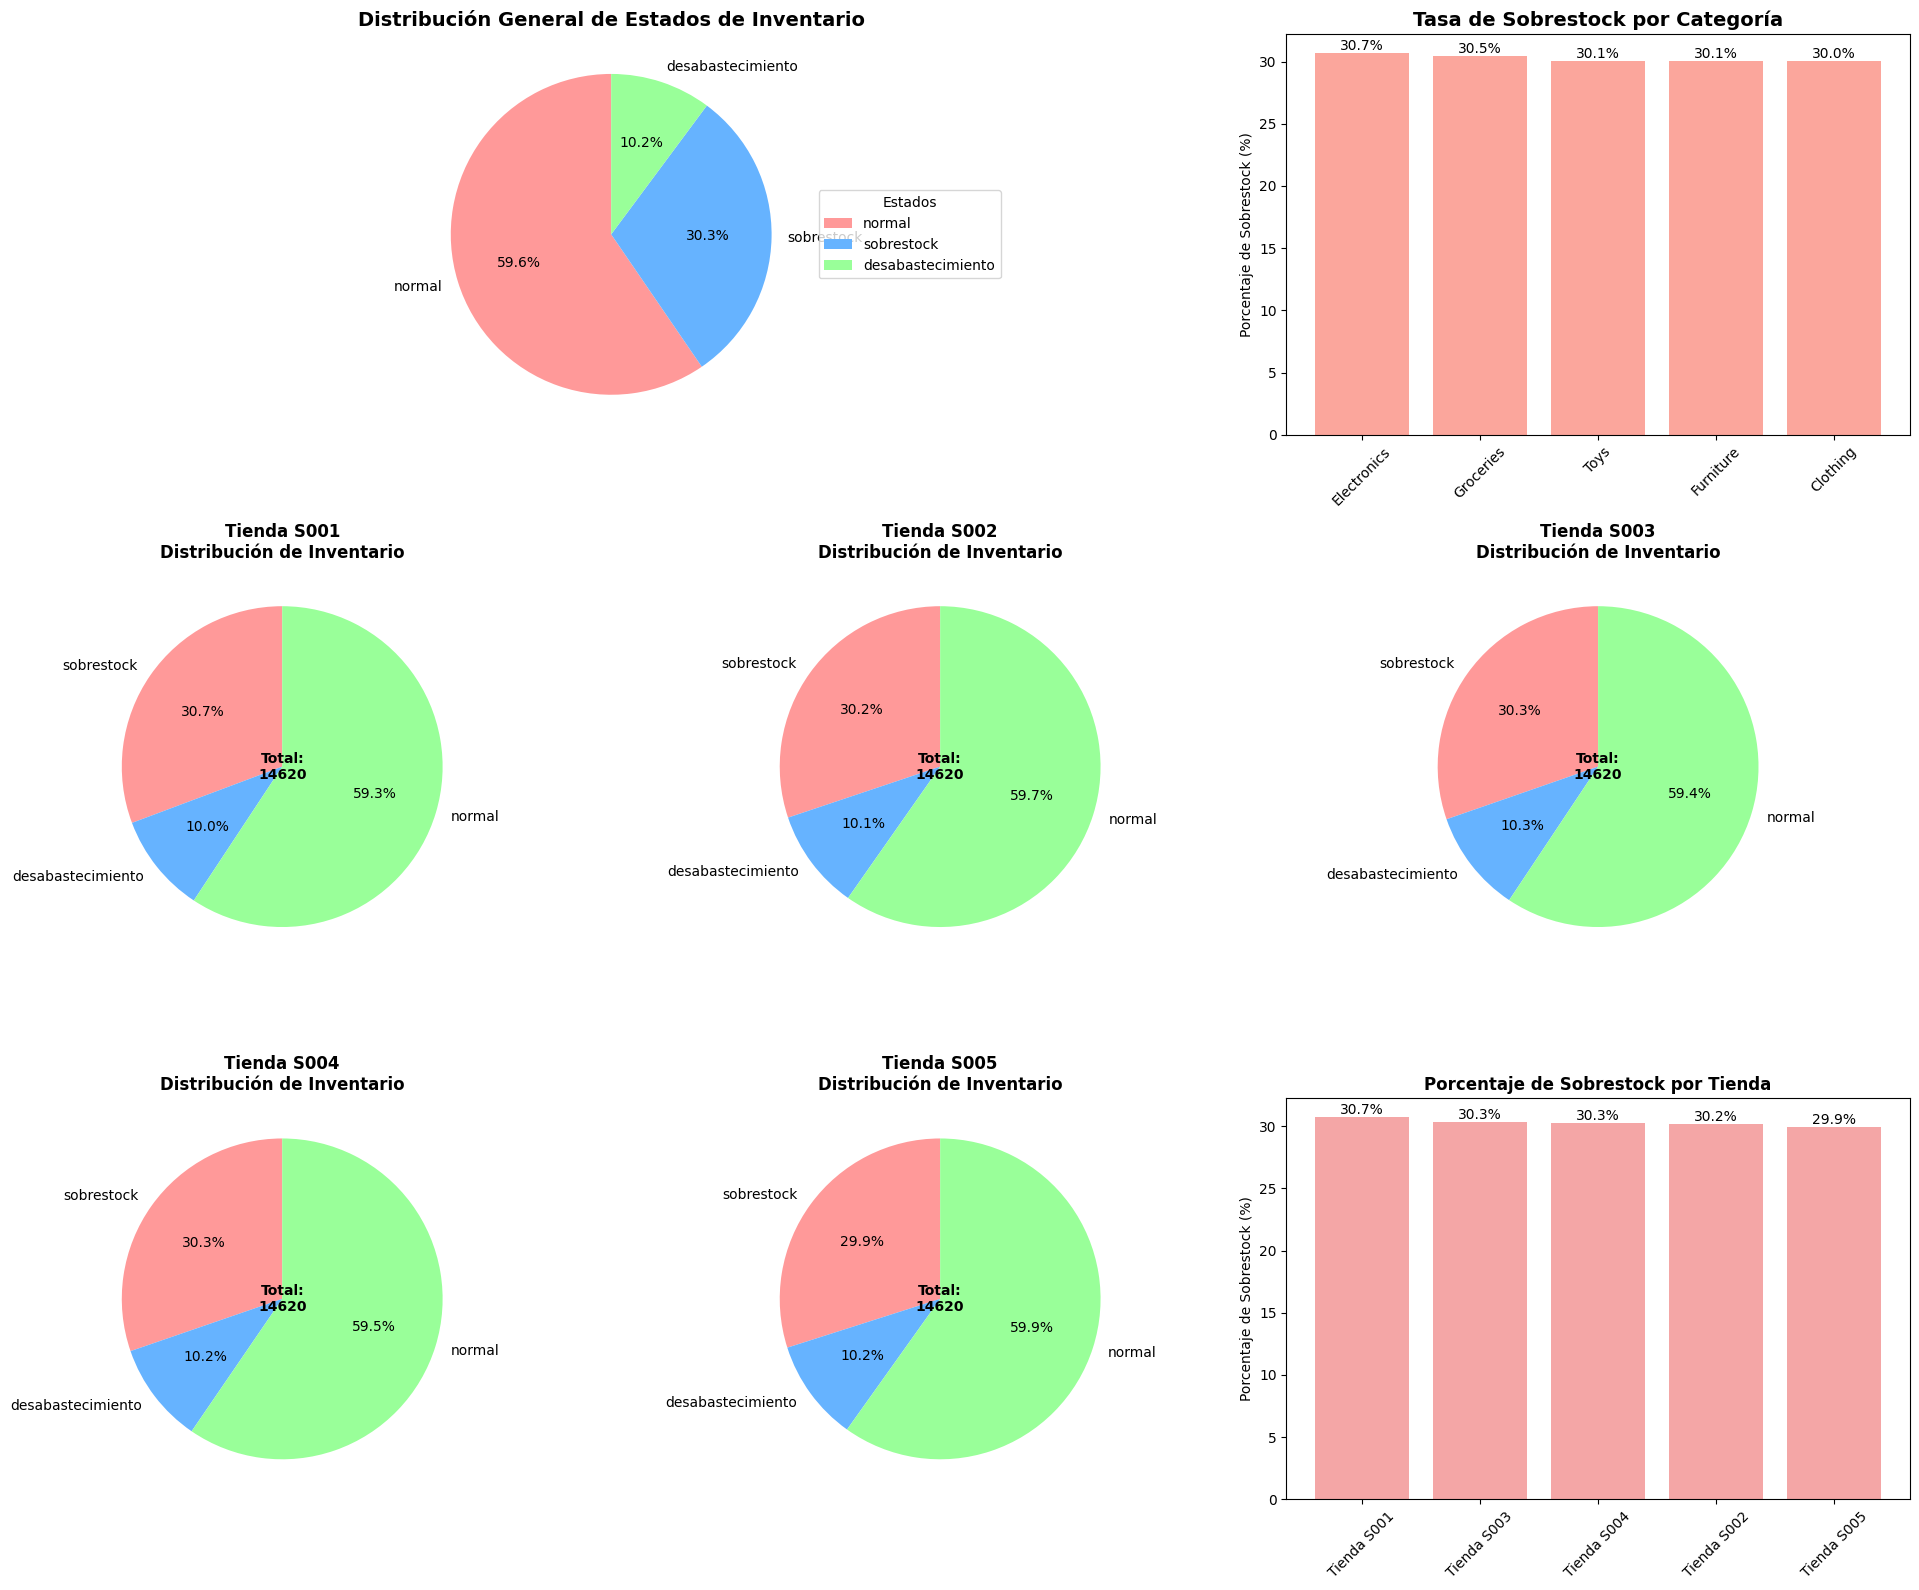

In [ ]:
# Análisis inicial del inventario
import pandas as pd  # Para trabajar con datos en tablas
import numpy as np   # Para cálculos matemáticos
import matplotlib.pyplot as plt  # Para crear gráficos
import seaborn as sns  # Para gráficos más bonitos
from datetime import datetime  # Para trabajar con fechas
import warnings  # Para manejar advertencias
import os  # Para trabajar con archivos y carpetas

# Ignorar advertencias para que no molesten en el análisis
warnings.filterwarnings('ignore')

class AnalizadorInventario:
    """
    Clase principal que analiza datos de inventario, ventas y pedidos
    Como un detective que examina los datos para encontrar problemas
    """

    def __init__(self, dataframe=None):
        """Inicializa el analizador - como preparar las herramientas de trabajo"""
        # Si nos dan datos, los usamos directamente
        if dataframe is not None:
            self.datos = dataframe
        else:
            # Si no, buscamos automáticamente un archivo de datos
            self.datos = self._cargar_datos_automaticamente()

        # Preparamos los datos para el análisis
        self._preparar_datos()
        # Creamos un diccionario vacío para guardar descubrimientos importantes
        self.insights = {}

    def _cargar_datos_automaticamente(self):
        """Busca y carga un archivo CSV automáticamente - como buscar un libro en una biblioteca"""
        posibles_rutas = []

        # 1. Primero buscar en Kaggle (entorno de competencia)
        input_dir = '/kaggle/input'
        if os.path.exists(input_dir):
            for dirname, _, filenames in os.walk(input_dir):
                for filename in filenames:
                    # Buscar archivos CSV que tengan "inventory" en el nombre
                    if filename.endswith('.csv') and 'inventory' in filename.lower():
                        ruta_kaggle = os.path.join(dirname, filename)
                        posibles_rutas.append(ruta_kaggle)
                        print(f"Archivo encontrado en Kaggle: {ruta_kaggle}")

        # 2. Buscar en el directorio actual del proyecto
        archivos_locales = [
            'retail_store_inventory.csv',
            'inventory_data.csv',
            'datos_inventario.csv',
            'inventory.csv',
            'data.csv'
        ]

        for archivo in archivos_locales:
            if os.path.exists(archivo):
                posibles_rutas.append(archivo)
                print(f"Archivo encontrado localmente: {archivo}")

        # 3. Buscar en estructura de proyecto típica
        rutas_proyecto = [
            'retail_store_inventory.csv',
            './proyecto/retail_store_inventory.csv',
            '../proyecto/retail_store_inventory.csv'
        ]

        for ruta in rutas_proyecto:
            if os.path.exists(ruta):
                posibles_rutas.append(ruta)
                print(f"Archivo encontrado en estructura de proyecto: {ruta}")

        # 4. Si no encontramos ningún archivo, mostrar error detallado
        if not posibles_rutas:
            print(". No se encontró ningún archivo CSV de inventario en las siguientes ubicaciones:")
            print("   - Directorio de Kaggle: /kaggle/input/")
            print("   - Directorio actual del script")
            print("   - Estructura de proyecto típica")
            print("   - Rutas relativas comunes")
            print("\n Por favor, asegúrate de que:")
            print("   1. El archivo CSV existe en una de las ubicaciones mencionadas")
            print("   2. El nombre del archivo contiene 'inventory'")
            print("   3. La ruta es correcta")
            raise FileNotFoundError("No se encontró ningún archivo CSV de inventario en las ubicaciones esperadas")

        # Elegir la primera ruta disponible
        archivo_csv = posibles_rutas[0]
        print(f"\n. Usando archivo: {archivo_csv}")
        print(f"Cargando datos desde: {archivo_csv}")

        try:
            # Leer el archivo CSV y devolver los datos
            datos = pd.read_csv(archivo_csv)
            print(f". Datos cargados exitosamente: {datos.shape[0]} filas, {datos.shape[1]} columnas")
            return datos
        except Exception as e:
            print(f". Error al cargar el archivo {archivo_csv}: {e}")
            # Intentar con la siguiente ruta si hay error
            if len(posibles_rutas) > 1:
                print(". Intentando con la siguiente ruta disponible...")
                for ruta_alternativa in posibles_rutas[1:]:
                    try:
                        datos = pd.read_csv(ruta_alternativa)
                        print(f". Datos cargados exitosamente desde alternativa: {ruta_alternativa}")
                        return datos
                    except Exception as e2:
                        print(f". Error con ruta alternativa {ruta_alternativa}: {e2}")

            raise Exception(f"No se pudo cargar ningún archivo CSV. Errores: {e}")

    def _preparar_datos(self):
        """Limpia y organiza los datos - como ordenar y limpiar una habitación desordenada"""
        # Limpiar nombres de columnas: quitar espacios y caracteres raros
        self.datos.columns = [col.lower().replace(' ', '_').replace('/', '_').replace('-', '_') for col in self.datos.columns]

        print("Columnas disponibles:", list(self.datos.columns))

        # Convertir fechas a formato correcto
        if 'date' in self.datos.columns:
            self.datos['date'] = pd.to_datetime(self.datos['date'])

        # Identificar columnas que son categorías (como tipos de producto)
        columnas_categoricas = ['store_id', 'product_id', 'category', 'region', 'weather_condition', 'seasonality']
        for col in columnas_categoricas:
            if col in self.datos.columns:
                self.datos[col] = self.datos[col].astype('category')

        # Manejar información de promociones y días festivos
        if 'holiday_promotion' in self.datos.columns:
            self.datos['holiday_promotion'] = self.datos['holiday_promotion'].astype('category')
        elif 'holiday/promotion' in self.datos.columns:
            self.datos = self.datos.rename(columns={'holiday/promotion': 'holiday_promotion'})
            self.datos['holiday_promotion'] = self.datos['holiday_promotion'].astype('category')

        # Crear nuevas métricas importantes para el análisis
        # 1. Sell-through: qué porcentaje del inventario se vendió
        if all(col in self.datos.columns for col in ['units_sold', 'inventory_level']):
            self.datos['sell_through'] = (self.datos['units_sold'] / self.datos['inventory_level']).replace([np.inf, -np.inf], 0)
            self.datos['sell_through'] = self.datos['sell_through'].fillna(0)

        # 2. Error de pronóstico: diferencia entre lo que pensábamos vender y lo que realmente vendimos
        if all(col in self.datos.columns for col in ['units_sold', 'demand_forecast']):
            self.datos['forecast_error'] = self.datos['units_sold'] - self.datos['demand_forecast']
            self.datos['abs_forecast_error'] = abs(self.datos['forecast_error'])

        # 3. Rotación de inventario: qué tan rápido se vende el inventario
        if 'inventory_level' in self.datos.columns:
            self.datos['inventory_turnover'] = self.datos['units_sold'] / (self.datos['inventory_level'] + 1)

        print("Datos preparados correctamente")
        print(f"Dimensiones del dataset: {self.datos.shape}")

    def analizar_sobrestock_desabastecimiento(self):
        """Detecta problemas de inventario - como un médico que diagnostica enfermedades"""
        # Verificar que tenemos los datos necesarios
        if 'sell_through' not in self.datos.columns:
            print("No se puede calcular sell_through. Faltan columnas necesarias.")
            return None

        # Definir límites para considerar problemas:
        UMBRAL_SOBRESTOCK = 0.3    # Menos del 30% vendido = demasiado inventario
        UMBRAL_DESABASTECIMIENTO = 0.9  # Más del 90% vendido = riesgo de quedarse sin stock

        print(f" UMBRALES DE ANÁLISIS APLICADOS:")
        print(f"   • Sobrestock: menos del {UMBRAL_SOBRESTOCK*100:.0f}% de inventario vendido")
        print(f"   • Desabastecimiento: más del {UMBRAL_DESABASTECIMIENTO*100:.0f}% de inventario vendido")
        print(f"   • Normal: entre {UMBRAL_SOBRESTOCK*100:.0f}% y {UMBRAL_DESABASTECIMIENTO*100:.0f}% de inventario vendido")
        print()

        # Crear condiciones para clasificar cada producto
        condiciones = [
            (self.datos['sell_through'] < UMBRAL_SOBRESTOCK),           # Sobrestock
            (self.datos['sell_through'] > UMBRAL_DESABASTECIMIENTO),    # Desabastecimiento
            ((self.datos['sell_through'] >= UMBRAL_SOBRESTOCK) &        # Normal
            (self.datos['sell_through'] <= UMBRAL_DESABASTECIMIENTO))
        ]

        # Etiquetas para cada condición
        categorias = ['sobrestock', 'desabastecimiento', 'normal']

        # Aplicar las condiciones y crear nueva columna
        self.datos['estado_inventario'] = np.select(condiciones, categorias, default='normal')

        # Contar cuántos productos hay en cada categoría
        conteo_estados = self.datos['estado_inventario'].value_counts()
        self.insights['sobrestock_count'] = conteo_estados.get('sobrestock', 0)
        self.insights['desabastecimiento_count'] = conteo_estados.get('desabastecimiento', 0)
        self.insights['normal_count'] = conteo_estados.get('normal', 0)

        # ANÁLISIS DETALLADO POR CATEGORÍA
        if 'category' in self.datos.columns:
            analisis_categoria = self.datos.groupby(['category', 'estado_inventario']).size().unstack(fill_value=0)

            print(" DISTRIBUCIÓN DETALLADA POR CATEGORÍA:")
            print("-" * 70)

            for categoria in analisis_categoria.index:
                total_categoria = analisis_categoria.loc[categoria].sum()
                sobrestock_cat = analisis_categoria.loc[categoria, 'sobrestock'] if 'sobrestock' in analisis_categoria.columns else 0
                desabast_cat = analisis_categoria.loc[categoria, 'desabastecimiento'] if 'desabastecimiento' in analisis_categoria.columns else 0
                normal_cat = analisis_categoria.loc[categoria, 'normal'] if 'normal' in analisis_categoria.columns else 0

                print(f"  {categoria.upper()}:")
                print(f"   • Total productos: {total_categoria:,}")
                print(f"   • Sobrestock: {sobrestock_cat:,} ({sobrestock_cat/total_categoria*100:.1f}%)")
                print(f"   • Desabastecimiento: {desabast_cat:,} ({desabast_cat/total_categoria*100:.1f}%)")
                print(f"   • Normal: {normal_cat:,} ({normal_cat/total_categoria*100:.1f}%)")
                print()

        # ANÁLISIS POR TIENDA
        if 'store_id' in self.datos.columns:
            analisis_tienda = self.datos.groupby(['store_id', 'estado_inventario']).size().unstack(fill_value=0)

            print(" DISTRIBUCIÓN POR TIENDA:")
            print("-" * 50)

            for tienda in analisis_tienda.index:
                total_tienda = analisis_tienda.loc[tienda].sum()
                sobrestock_tienda = analisis_tienda.loc[tienda, 'sobrestock'] if 'sobrestock' in analisis_tienda.columns else 0

                if sobrestock_tienda > 0:
                    print(f"   • Tienda {tienda}: {sobrestock_tienda:,} productos con sobrestock ({sobrestock_tienda/total_tienda*100:.1f}%)")

        # ANÁLISIS DE SELL-THROUGH PROMEDIO
        sell_through_stats = self.datos.groupby('estado_inventario')['sell_through'].agg(['mean', 'median', 'std'])

        print(" ESTADÍSTICAS DE SELL-THROUGH POR ESTADO:")
        print("-" * 60)
        for estado in sell_through_stats.index:
            stats = sell_through_stats.loc[estado]
            print(f"   • {estado.upper()}:")
            print(f"      - Promedio: {stats['mean']:.3f} ({stats['mean']*100:.1f}%)")
            print(f"      - Mediana: {stats['median']:.3f} ({stats['median']*100:.1f}%)")
            print(f"      - Desviación: {stats['std']:.3f}")

        # IDENTIFICAR LOS CASOS MÁS EXTREMOS
        print("\n CASOS MÁS CRÍTICOS IDENTIFICADOS:")
        print("-" * 50)

        # Productos con mayor sobrestock (menor sell-through)
        mayor_sobrestock = self.datos[self.datos['estado_inventario'] == 'sobrestock'].nsmallest(5, 'sell_through')
        if not mayor_sobrestock.empty:
            print(" PRODUCTOS CON MAYOR SOBRESTOCK (menor sell-through):")
            for idx, row in mayor_sobrestock.iterrows():
                print(f"   • Producto {row['product_id']} (Tienda {row['store_id']}):")
                print(f"      - Sell-through: {row['sell_through']:.4f} ({row['sell_through']*100:.2f}%)")
                print(f"      - Inventario: {row['inventory_level']} unidades")
                print(f"      - Ventas: {row['units_sold']} unidades")

        # Productos con mayor riesgo de desabastecimiento
        mayor_desabastecimiento = self.datos[self.datos['estado_inventario'] == 'desabastecimiento'].nlargest(5, 'sell_through')
        if not mayor_desabastecimiento.empty:
            print("\n  PRODUCTOS CON MAYOR RIESGO DE DESABASTECIMIENTO:")
            for idx, row in mayor_desabastecimiento.iterrows():
                print(f"   • Producto {row['product_id']} (Tienda {row['store_id']}):")
                print(f"      - Sell-through: {row['sell_through']:.4f} ({row['sell_through']*100:.2f}%)")
                print(f"      - Inventario: {row['inventory_level']} unidades")
                print(f"      - Ventas: {row['units_sold']} unidades")

        # RESUMEN EJECUTIVO
        total_registros = len(self.datos)
        porcentaje_sobrestock = (self.insights['sobrestock_count'] / total_registros) * 100
        porcentaje_desabastecimiento = (self.insights['desabastecimiento_count'] / total_registros) * 100
        porcentaje_normal = (self.insights['normal_count'] / total_registros) * 100

        print("\n RESUMEN EJECUTIVO DEL ANÁLISIS DE INVENTARIO:")
        print("=" * 70)
        print(f"DISTRIBUCIÓN GENERAL:")
        print(f"   •  INVENTARIO NORMAL: {self.insights['normal_count']:,} productos ({porcentaje_normal:.1f}%)")
        print(f"   •  SOBRESTOCK: {self.insights['sobrestock_count']:,} productos ({porcentaje_sobrestock:.1f}%)")
        print(f"   •   DESABASTECIMIENTO: {self.insights['desabastecimiento_count']:,} productos ({porcentaje_desabastecimiento:.1f}%)")
        print(f"   •  TOTAL ANALIZADO: {total_registros:,} productos")

        print(f"\n INTERPRETACIÓN:")
        if porcentaje_sobrestock > 25:
            print(f"   •  ALTA PRIORIDAD: {porcentaje_sobrestock:.1f}% de sobrestock indica exceso significativo de inventario")
        elif porcentaje_sobrestock > 15:
            print(f"   •   ATENCIÓN: {porcentaje_sobrestock:.1f}% de sobrestock requiere revisión de políticas de compra")
        else:
            print(f"   •  ACEPTABLE: {porcentaje_sobrestock:.1f}% de sobrestock dentro de parámetros manejables")

        if porcentaje_desabastecimiento > 15:
            print(f"   • ALTA PRIORIDAD: {porcentaje_desabastecimiento:.1f}% de desabastecimiento indica problemas graves de reposición")
        elif porcentaje_desabastecimiento > 8:
            print(f"   •  ATENCIÓN: {porcentaje_desabastecimiento:.1f}% de desabastecimiento requiere optimización de puntos de reorden")
        else:
            print(f"   •  ACEPTABLE: {porcentaje_desabastecimiento:.1f}% de desabastecimiento dentro de niveles óptimos")

        # IMPACTO FINANCIERO ESTIMADO
        if 'inventory_level' in self.datos.columns and 'price' in self.datos.columns:
            # Calcular valor del inventario en sobrestock
            sobrestock_data = self.datos[self.datos['estado_inventario'] == 'sobrestock']
            valor_sobrestock = (sobrestock_data['inventory_level'] * sobrestock_data['price']).sum()

            print(f"\n IMPACTO FINANCIERO ESTIMADO:")
            print(f"   • Valor aproximado en sobrestock: ${valor_sobrestock:,.2f}")
            print(f"   • Capital inmovilizado que podría optimizarse")

        # Devolver ejemplos de los problemas encontrados
        print(f"\n EJEMPLOS DE CASOS IDENTIFICADOS:")
        print("-" * 50)
        ejemplos = self.datos[['store_id', 'product_id', 'category', 'inventory_level', 'units_sold',
                            'sell_through', 'estado_inventario']].head(3)

        for idx, row in ejemplos.iterrows():
            estado_icon = "" if row['estado_inventario'] == 'sobrestock' else "" if row['estado_inventario'] == 'desabastecimiento' else " "
            print(f"   {estado_icon} Producto {row['product_id']} (Tienda {row['store_id']}, {row['category']}):")
            print(f"      - Estado: {row['estado_inventario']}")
            print(f"      - Sell-through: {row['sell_through']:.3f} ({row['sell_through']*100:.1f}%)")
            print(f"      - Inventario/Ventas: {row['inventory_level']}/{row['units_sold']} unidades")

        return self.datos[['store_id', 'product_id', 'inventory_level', 'units_sold',
                        'sell_through', 'estado_inventario']].head()
    def calcular_metricas_por_categoria(self):
        """Agrupa y calcula métricas por categoría - como organizar productos por tipo"""
        if 'category' not in self.datos.columns:
            print("No hay columna 'category' para agrupar")
            return {}

        # Definir qué métricas calcular para cada categoría
        metricas = {}

        if 'units_sold' in self.datos.columns:
            metricas['ventas_totales'] = ('units_sold', 'sum')  # Sumar todas las ventas

        if 'inventory_level' in self.datos.columns:
            metricas['inventario_promedio'] = ('inventory_level', 'mean')  # Promedio de inventario

        if 'units_ordered' in self.datos.columns:
            metricas['pedidos_totales'] = ('units_ordered', 'sum')  # Sumar todos los pedidos

        if 'estado_inventario' in self.datos.columns:
            # Calcular porcentaje de productos con problemas
            metricas['tasa_sobrestock'] = ('estado_inventario', lambda x: (x == 'sobrestock').mean())
            metricas['tasa_desabastecimiento'] = ('estado_inventario', lambda x: (x == 'desabastecimiento').mean())

        if 'abs_forecast_error' in self.datos.columns:
            metricas['error_pronostico_promedio'] = ('abs_forecast_error', 'mean')  # Error promedio

        # Calcular cada métrica para cada categoría
        resultados = {}
        for nombre_metrica, (columna, operacion) in metricas.items():
            try:
                if operacion == 'sum':
                    resultados[nombre_metrica] = self.datos.groupby('category')[columna].sum().to_dict()
                elif operacion == 'mean':
                    resultados[nombre_metrica] = self.datos.groupby('category')[columna].mean().to_dict()
                else:
                    resultados[nombre_metrica] = self.datos.groupby('category')[columna].apply(operacion).to_dict()
            except Exception as e:
                print(f"Error calculando {nombre_metrica}: {e}")

        # Guardar resultados para usar después
        self.insights['metricas_por_categoria'] = resultados

        # MOSTRAR RESULTADOS DETALLADOS
        print(" MÉTRICAS DETALLADAS POR CATEGORÍA CALCULADAS:")
        print("-" * 70)

        if resultados:
            # Obtener lista de categorías
            categorias = list(resultados.get('tasa_sobrestock', {}).keys())
            print(f" Se analizaron {len(categorias)} categorías: {', '.join(categorias)}")
            print()

            # Mostrar detalles de cada métrica
            for nombre_metrica, valores in resultados.items():
                print(f" {nombre_metrica.replace('_', ' ').title()}:")

                if nombre_metrica == 'ventas_totales':
                    for categoria, valor in valores.items():
                        print(f"   • {categoria}: {valor:,} unidades vendidas")

                elif nombre_metrica == 'inventario_promedio':
                    for categoria, valor in valores.items():
                        print(f"   • {categoria}: {valor:.1f} unidades en promedio")

                elif nombre_metrica == 'pedidos_totales':
                    for categoria, valor in valores.items():
                        print(f"   • {categoria}: {valor:,} unidades pedidas")

                elif nombre_metrica == 'tasa_sobrestock':
                    # Ordenar de mayor a menor problema
                    sorted_items = sorted(valores.items(), key=lambda x: x[1], reverse=True)
                    for categoria, tasa in sorted_items:
                        print(f"   • {categoria}: {tasa*100:.1f}% de productos con sobrestock")

                elif nombre_metrica == 'tasa_desabastecimiento':
                    # Ordenar de mayor a menor problema
                    sorted_items = sorted(valores.items(), key=lambda x: x[1], reverse=True)
                    for categoria, tasa in sorted_items:
                        print(f"   • {categoria}: {tasa*100:.1f}% de productos con desabastecimiento")

                elif nombre_metrica == 'error_pronostico_promedio':
                    for categoria, error in valores.items():
                        print(f"   • {categoria}: {error:.1f} unidades de error promedio")

                print()  # Línea en blanco entre métricas

            # ANÁLISIS COMPARATIVO ENTRE CATEGORÍAS
            print(" ANÁLISIS COMPARATIVO ENTRE CATEGORÍAS:")
            print("-" * 50)

            if 'ventas_totales' in resultados:
                ventas = resultados['ventas_totales']
                categoria_mas_ventas = max(ventas.items(), key=lambda x: x[1])
                categoria_menos_ventas = min(ventas.items(), key=lambda x: x[1])
                print(f"   • Mayor volumen de ventas: {categoria_mas_ventas[0]} ({categoria_mas_ventas[1]:,} unidades)")
                print(f"   • Menor volumen de ventas: {categoria_menos_ventas[0]} ({categoria_menos_ventas[1]:,} unidades)")

            if 'tasa_sobrestock' in resultados:
                sobrestock = resultados['tasa_sobrestock']
                categoria_mas_problematica = max(sobrestock.items(), key=lambda x: x[1])
                categoria_menos_problematica = min(sobrestock.items(), key=lambda x: x[1])
                print(f"   • Mayor problema de sobrestock: {categoria_mas_problematica[0]} ({categoria_mas_problematica[1]*100:.1f}%)")
                print(f"   • Menor problema de sobrestock: {categoria_menos_problematica[0]} ({categoria_menos_problematica[1]*100:.1f}%)")

            if 'error_pronostico_promedio' in resultados:
                errores = resultados['error_pronostico_promedio']
                categoria_mas_error = max(errores.items(), key=lambda x: abs(x[1]))
                categoria_menos_error = min(errores.items(), key=lambda x: abs(x[1]))
                print(f"   • Mayor error de pronóstico: {categoria_mas_error[0]} ({categoria_mas_error[1]:.1f} unidades)")
                print(f"   • Menor error de pronóstico: {categoria_menos_error[0]} ({categoria_menos_error[1]:.1f} unidades)")

        return resultados

    def generar_reporte_insights(self):
        """Genera un reporte con descubrimientos importantes - como escribir las conclusiones"""
        print("=" * 70)
        print("REPORTE DETALLADO DE ANÁLISIS DE INVENTARIO Y DEMANDA")
        print("=" * 70)

        # Información básica del dataset
        print(f"\n INFORMACIÓN GENERAL DEL DATASET:")
        print(f"   • Total de registros analizados: {len(self.datos):,}")
        print(f"   • Período analizado: {self.datos['date'].min().strftime('%Y-%m-%d') if 'date' in self.datos.columns else 'N/A'} a "
              f"{self.datos['date'].max().strftime('%Y-%m-%d') if 'date' in self.datos.columns else 'N/A'}")
        print(f"   • Tiendas únicas: {self.datos['store_id'].nunique() if 'store_id' in self.datos.columns else 'N/A'}")
        print(f"   • Productos únicos: {self.datos['product_id'].nunique() if 'product_id' in self.datos.columns else 'N/A'}")
        print(f"   • Categorías de productos: {self.datos['category'].nunique() if 'category' in self.datos.columns else 'N/A'}")

        # Mostrar problemas encontrados
        if 'sobrestock_count' in self.insights:
            print(f"\n PROBLEMAS CRÍTICOS DETECTADOS:")
            total_registros = len(self.datos)
            print(f"   • SOBRESTOCK: {self.insights['sobrestock_count']:,} productos ({self.insights['sobrestock_count']/total_registros*100:.1f}%)")
            print(f"   • DESABASTECIMIENTO: {self.insights['desabastecimiento_count']:,} productos ({self.insights['desabastecimiento_count']/total_registros*100:.1f}%)")
            print(f"   • INVENTARIO NORMAL: {self.insights['normal_count']:,} productos ({self.insights['normal_count']/total_registros*100:.1f}%)")

        # Información sobre pronósticos
        if 'mae_pronostico' in self.insights:
            print(f"\n EFICIENCIA DE PRONÓSTICOS DE DEMANDA:")
            print(f"   • Error absoluto promedio (MAE): {self.insights['mae_pronostico']:.2f} unidades")
            print(f"   • Error porcentual promedio (MAPE): {self.insights['mape_pronostico']:.1f}%")
            print(f"   • Exactitud del pronóstico: {self.insights['exactitud_pronostico']:.1f}%")

        # ANÁLISIS DETALLADO POR CATEGORÍA
        if 'metricas_por_categoria' in self.insights:
            metricas = self.insights['metricas_por_categoria']

            print(f"\n ANÁLISIS DETALLADO POR CATEGORÍA DE PRODUCTO:")
            print("-" * 60)

            # Crear tabla resumen por categoría
            categorias = list(metricas['tasa_sobrestock'].keys()) if 'tasa_sobrestock' in metricas else []

            for categoria in categorias:
                print(f"\n CATEGORÍA: {categoria.upper()}")

                # Ventas
                if 'ventas_totales' in metricas:
                    ventas = metricas['ventas_totales'].get(categoria, 0)
                    print(f"   • Ventas totales: {ventas:,} unidades")

                # Inventario
                if 'inventario_promedio' in metricas:
                    inventario = metricas['inventario_promedio'].get(categoria, 0)
                    print(f"   • Inventario promedio: {inventario:.1f} unidades")

                # Problemas de inventario
                if 'tasa_sobrestock' in metricas:
                    sobrestock = metricas['tasa_sobrestock'].get(categoria, 0) * 100
                    desabastecimiento = metricas['tasa_desabastecimiento'].get(categoria, 0) * 100
                    print(f"   • Tasa de sobrestock: {sobrestock:.1f}%")
                    print(f"   • Tasa de desabastecimiento: {desabastecimiento:.1f}%")

                # Error de pronóstico
                if 'error_pronostico_promedio' in metricas:
                    error = metricas['error_pronostico_promedio'].get(categoria, 0)
                    print(f"   • Error de pronóstico promedio: {error:.1f} unidades")

        # Mostrar las categorías más problemáticas
        if 'metricas_por_categoria' in self.insights and 'tasa_sobrestock' in self.insights['metricas_por_categoria']:
            # Ordenar categorías de más problemática a menos problemática
            categorias_problematicas = sorted(
                self.insights['metricas_por_categoria']['tasa_sobrestock'].items(),
                key=lambda x: x[1],
                reverse=True
            )

            print(f"\n  RANKING DE CATEGORÍAS POR PROBLEMAS DE SOBRESTOCK:")
            for i, (categoria, tasa) in enumerate(categorias_problematicas[:5], 1):
                print(f"   {i}. {categoria}: {tasa*100:.1f}% de productos con sobrestock")

        # Recomendaciones basadas en los datos
        print(f"\n RECOMENDACIONES ESTRATÉGICAS:")

        # Decidir qué problema es más urgente
        if ('sobrestock_count' in self.insights and 'desabastecimiento_count' in self.insights):
            if self.insights['sobrestock_count'] > self.insights['desabastecimiento_count']:
                print("   •  PRIORIDAD ALTA: Reducir sobrestock mediante:")
                print("        - Promociones y descuentos estratégicos")
                print("        - Ajustar niveles de reposición")
                print("        - Revisar políticas de compra")
            else:
                print("   •  PRIORIDAD ALTA: Mejorar reposición para evitar desabastecimientos:")
                print("        - Optimizar puntos de reorden")
                print("        - Mejorar coordinación con proveedores")
                print("        - Implementar sistema de alertas tempranas")

        # Recomendación sobre pronósticos si hay mucho error
        if 'mape_pronostico' in self.insights and self.insights['mape_pronostico'] > 20:
            print("   • Mejorar sistema de pronóstico de demanda:")
            print("        - Incorporar variables estacionales")
            print("        - Considerar factores externos (clima, promociones)")
            print("        - Revisar y actualizar modelos predictivos")

        # Mostrar qué categorías rotan más rápido (se venden mejor)
        if 'inventory_turnover' in self.datos.columns and 'category' in self.datos.columns:
            rotaciones = self.datos.groupby('category')['inventory_turnover'].mean()
            if not rotaciones.empty:
                mejor_cat = rotaciones.idxmax()
                peor_cat = rotaciones.idxmin()

                print(f"\n ANÁLISIS DE ROTACIÓN DE INVENTARIO:")
                print(f"   • MEJOR ROTACIÓN: {mejor_cat} ({rotaciones.max():.3f})")
                print(f"     - Los productos se venden más rápido")
                print(f"     - Menor tiempo de almacenamiento")
                print(f"   • PEOR ROTACIÓN: {peor_cat} ({rotaciones.min():.3f})")
                print(f"     - Los productos permanecen más tiempo en inventario")
                print(f"     - Mayor riesgo de obsolescencia")

        # Resumen ejecutivo
        print(f"\n RESUMEN EJECUTIVO:")
        total_problemas = self.insights.get('sobrestock_count', 0) + self.insights.get('desabastecimiento_count', 0)
        porcentaje_problemas = (total_problemas / len(self.datos)) * 100 if len(self.datos) > 0 else 0

        print(f"   • {porcentaje_problemas:.1f}% de los productos tienen problemas de inventario")
        print(f"   • El sobrestock representa el {self.insights.get('sobrestock_count', 0)/total_problemas*100:.1f}% de los problemas") if total_problemas > 0 else None
        print(f"   • Se recomienda acción inmediata en las categorías identificadas")

    def visualizar_resultados(self):
        """Crea gráficos para entender mejor los datos - como dibujar un mapa del tesoro"""
        try:
            # Crear 3 gráficos: uno general y 5 para las tiendas
            fig = plt.figure(figsize=(20, 16))

            # 1. Gráfico de pastel - distribución general de estados de inventario
            ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
            if 'estado_inventario' in self.datos.columns:
                counts = self.datos['estado_inventario'].value_counts()
                colors = ['#ff9999', '#66b3ff', '#99ff99']
                ax1.pie(counts.values, labels=counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
                ax1.set_title('Distribución General de Estados de Inventario', fontsize=14, fontweight='bold')
                ax1.legend(counts.index, title="Estados", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
            else:
                ax1.text(0.5, 0.5, 'Datos no disponibles\npara estados de inventario',
                        ha='center', va='center', transform=ax1.transAxes)
                ax1.set_title('Distribución Estados de Inventario')

            # 2. Gráfico de barras - tasa de sobrestock por categoría
            ax2 = plt.subplot2grid((3, 3), (0, 2))
            if ('estado_inventario' in self.datos.columns and 'category' in self.datos.columns and
                'sobrestock' in self.datos['estado_inventario'].values):
                # Calcular porcentaje de sobrestock por categoría
                tasa_sobrestock = (self.datos[self.datos['estado_inventario'] == 'sobrestock']
                                .groupby('category').size() / self.datos.groupby('category').size())
                if not tasa_sobrestock.empty:
                    # Ordenar de mayor a menor
                    tasa_sobrestock = tasa_sobrestock.sort_values(ascending=False)

                    bars = ax2.bar(tasa_sobrestock.index, tasa_sobrestock.values * 100, color='salmon', alpha=0.7)
                    ax2.set_title('Tasa de Sobrestock por Categoría', fontsize=14, fontweight='bold')
                    ax2.set_ylabel('Porcentaje de Sobrestock (%)')
                    ax2.tick_params(axis='x', rotation=45)

                    # Añadir valores en las barras
                    for bar in bars:
                        height = bar.get_height()
                        ax2.text(bar.get_x() + bar.get_width()/2., height,
                                f'{height:.1f}%', ha='center', va='bottom')
                else:
                    ax2.text(0.5, 0.5, 'No hay datos de sobrestock',
                            ha='center', va='center', transform=ax2.transAxes)
                    ax2.set_title('Tasa de Sobrestock por Categoría')
            else:
                ax2.text(0.5, 0.5, 'Datos no disponibles\npara tasa de sobrestock',
                        ha='center', va='center', transform=ax2.transAxes)
                ax2.set_title('Tasa de Sobrestock por Categoría')

            # 3. GRÁFICOS DE PASTEL POR TIENDA
            if 'store_id' in self.datos.columns and 'estado_inventario' in self.datos.columns:
                # Obtener las 5 primeras tiendas
                tiendas = sorted(self.datos['store_id'].unique())[:5]

                # Posiciones para los subplots de tiendas
                posiciones = [(1, 0), (1, 1), (1, 2), (2, 0), (2, 1)]
                colores_tienda = ['#ff9999', '#66b3ff', '#99ff99']  # Rojo, azul, verde

                for i, tienda in enumerate(tiendas):
                    if i < len(posiciones):
                        fila, col = posiciones[i]
                        ax = plt.subplot2grid((3, 3), (fila, col))

                        # Filtrar datos para la tienda actual
                        datos_tienda = self.datos[self.datos['store_id'] == tienda]
                        counts_tienda = datos_tienda['estado_inventario'].value_counts()

                        if not counts_tienda.empty:
                            # Asegurarse de que tengamos los 3 estados (añadir ceros si faltan)
                            for estado in ['sobrestock', 'desabastecimiento', 'normal']:
                                if estado not in counts_tienda:
                                    counts_tienda[estado] = 0

                            # Ordenar para consistencia
                            counts_tienda = counts_tienda.reindex(['sobrestock', 'desabastecimiento', 'normal'], fill_value=0)

                            ax.pie(counts_tienda.values, labels=counts_tienda.index,
                                  autopct='%1.1f%%', colors=colores_tienda, startangle=90)
                            ax.set_title(f'Tienda {tienda}\nDistribución de Inventario', fontsize=12, fontweight='bold')

                            # Añadir número total de productos en el centro
                            total_productos = counts_tienda.sum()
                            ax.text(0, 0, f'Total:\n{total_productos}', ha='center', va='center',
                                  fontsize=10, fontweight='bold', transform=ax.transData)
                        else:
                            ax.text(0.5, 0.5, f'No hay datos\npara Tienda {tienda}',
                                  ha='center', va='center', transform=ax.transAxes)
                            ax.set_title(f'Tienda {tienda}')

                # Si hay menos de 5 tiendas, limpiar los subplots sobrantes
                for i in range(len(tiendas), 5):
                    if i < len(posiciones):
                        fila, col = posiciones[i]
                        ax = plt.subplot2grid((3, 3), (fila, col))
                        ax.axis('off')

            # 4. Gráfico adicional en la posición (2,2) - Resumen comparativo
            ax_resumen = plt.subplot2grid((3, 3), (2, 2))
            if 'store_id' in self.datos.columns and 'estado_inventario' in self.datos.columns:
                # Calcular porcentaje de sobrestock por tienda
                resumen_tiendas = self.datos.groupby('store_id').apply(
                    lambda x: (x['estado_inventario'] == 'sobrestock').mean() * 100
                ).sort_values(ascending=False)

                if not resumen_tiendas.empty:
                    bars = ax_resumen.bar(range(len(resumen_tiendas)), resumen_tiendas.values,
                                        color='lightcoral', alpha=0.7)
                    ax_resumen.set_title('Porcentaje de Sobrestock por Tienda', fontsize=12, fontweight='bold')
                    ax_resumen.set_ylabel('Porcentaje de Sobrestock (%)')
                    ax_resumen.set_xticks(range(len(resumen_tiendas)))
                    ax_resumen.set_xticklabels([f'Tienda {tid}' for tid in resumen_tiendas.index], rotation=45)

                    # Añadir valores en las barras
                    for bar in bars:
                        height = bar.get_height()
                        ax_resumen.text(bar.get_x() + bar.get_width()/2., height,
                                      f'{height:.1f}%', ha='center', va='bottom')
                else:
                    ax_resumen.text(0.5, 0.5, 'No hay datos\npara resumen de tiendas',
                                  ha='center', va='center', transform=ax_resumen.transAxes)
                    ax_resumen.set_title('Resumen por Tienda')
            else:
                ax_resumen.text(0.5, 0.5, 'Datos no disponibles\npara análisis por tienda',
                              ha='center', va='center', transform=ax_resumen.transAxes)
                ax_resumen.set_title('Resumen por Tienda')

            # Ajustar el espacio entre gráficos y mostrarlos
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Error en visualizaciones: {e}")

# FUNCIÓN PRINCIPAL - COORDINA TODO EL ANÁLISIS
def ejecutar_analisis_completo(dataframe=None):
    """Función principal que ejecuta todo el análisis paso a paso"""

    try:
        # Crear el analizador (como contratar al detective)
        print(" INICIANDO ANÁLISIS COMPLETO DE INVENTARIO Y DEMANDA...")
        analizador = AnalizadorInventario(dataframe)

        # Ejecutar análisis en secuencia:
        print("\n" + "="*60)
        print("1.  DETECTANDO SOBRESTOCK Y DESABASTECIMIENTO...")
        resultado_inventario = analizador.analizar_sobrestock_desabastecimiento()

        print("\n" + "="*60)
        print("2.  CALCULANDO MÉTRICAS POR CATEGORÍA...")
        metricas_categoria = analizador.calcular_metricas_por_categoria()

        print("\n" + "="*60)
        print("3.  GENERANDO REPORTE DETALLADO DE INSIGHTS...")
        analizador.generar_reporte_insights()

        print("\n" + "="*60)
        print("4.  CREANDO VISUALIZACIONES...")
        analizador.visualizar_resultados()

        return analizador

    except Exception as e:
        print(f" Error durante el análisis: {e}")
        return None

# EJECUCIÓN AUTOMÁTICA CUANDO SE EJECUTA EL ARCHIVO
if __name__ == "__main__":
    print(" Módulo de análisis de inventario y demanda")
    print("   • Carga automática de datos desde /kaggle/input")
    print("   • Detección de sobrestock y desabastecimiento")
    print("   • Análisis detallado por categoría")
    print("   • Generación de insights accionables")
    print("   • Visualizaciones para toma de decisiones")

    # Ejecutar análisis automáticamente
    print("\n" + " " * 15 + " INICIANDO ANÁLISIS " + " " * 15)
    analizador = ejecutar_analisis_completo()

## EDA

In [ ]:
# ==================================
# 1) Carga de datos y tipo de datos - CON CARGA AUTOMÁTICA
# ==================================

try:
    print(". Buscando y cargando datos automáticamente...")

    print("\n---Carga simple con AnalizadorInventario ---")
    analizador = AnalizadorInventario()
    df = analizador.datos  # Esto ya tiene los datos cargados y preparados

    print(". Datos cargados automáticamente:")
    print(f"   • Filas: {df.shape[0]:,}")
    print(f"   • Columnas: {df.shape[1]}")
    print(f"   • Columnas disponibles: {list(df.columns)}")
    print(f"   • Período: {df['date'].min().strftime('%Y-%m-%d') if 'date' in df.columns else 'N/A'} a {df['date'].max().strftime('%Y-%m-%d') if 'date' in df.columns else 'N/A'}")

    # Mostrar los primeros registros
    print("\n. Primeros registros:")
    display(df.head())

except Exception as e:
    print(f". Ocurrió un error al cargar los datos automáticamente: {e}")


# Verificar que tenemos datos
if df is not None:
    print(f"\n. ¡Datos listos para análisis!")
    print(f"   • Memoria usada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f"   • Tipos de datos:")
    print(df.dtypes.value_counts())
else:
    print(". No se pudieron cargar los datos para el análisis")

. Buscando y cargando datos automáticamente...

---Carga simple con AnalizadorInventario ---
Archivo encontrado en Kaggle: /kaggle/input/retail-store-inventory-forecasting-dataset/retail_store_inventory.csv

. Usando archivo: /kaggle/input/retail-store-inventory-forecasting-dataset/retail_store_inventory.csv
Cargando datos desde: /kaggle/input/retail-store-inventory-forecasting-dataset/retail_store_inventory.csv
. Datos cargados exitosamente: 73100 filas, 15 columnas
Columnas disponibles: ['date', 'store_id', 'product_id', 'category', 'region', 'inventory_level', 'units_sold', 'units_ordered', 'demand_forecast', 'price', 'discount', 'weather_condition', 'holiday_promotion', 'competitor_pricing', 'seasonality']
Datos preparados correctamente
Dimensiones del dataset: (73100, 19)
. Datos cargados automáticamente:
   • Filas: 73,100
   • Columnas: 19
   • Columnas disponibles: ['date', 'store_id', 'product_id', 'category', 'region', 'inventory_level', 'units_sold', 'units_ordered', 'demand

date store_id product_id     category region  inventory_level  \
0 2022-01-01     S001      P0001    Groceries  North              231   
1 2022-01-01     S001      P0002         Toys  South              204   
2 2022-01-01     S001      P0003         Toys   West              102   
3 2022-01-01     S001      P0004         Toys  North              469   
4 2022-01-01     S001      P0005  Electronics   East              166   

   units_sold  units_ordered  demand_forecast  price  discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  weather_condition holiday_promotion  competitor_pricing seasonality  \
0             Rainy                 0               29.69      Autumn   
1             Sunny                 0               66.16      Autumn   
2             Sunny                 1               31.32      Summer   
3            Cloudy                 1               34.74      Autumn   
4             Sunny                 0               68.95      Summer   

   sell_through  forecast_error  abs_forecast_error  inventory_turnover  
0      0.549784           -8.47                8.47            0.547414  
1      0.735294            5.96                5.96            0.731707  
2      0.637255           -9.02                9.02            0.631068  
3      0.130064           -1.18                1.18            0.129787  
4      0.084337            4.74                4.74            0.083832


. ¡Datos listos para análisis!
   • Memoria usada: 7.18 MB
   • Tipos de datos:
float64           7
int64             4
category          1
datetime64[ns]    1
category          1
category          1
category          1
category          1
category          1
category          1
Name: count, dtype: int64


In [ ]:
# =======================
# 2) Chequeos iniciales
# =======================
print("Filas, Columnas:", df.shape)
display(df.sample(5, random_state=SEED))
display(df.describe(include="all").T)

# Missings
missing = df.isna().mean().sort_values(ascending=False)
display(missing.to_frame("missing_rate"))

# Rango temporal
if "date" in df.columns:
    print("Inicio:", df["date"].min(), "| Fin:", df["date"].max(), "| Días:", df["date"].nunique())

# Duplicados lógicos (mismo día, tienda, producto)
key_cols = [c for c in ["date", "store_id", "product_id"] if c in df.columns]
if len(key_cols) == 3:
    dups = df.duplicated(subset=key_cols).sum()
    print(f"Duplicados en {key_cols}: {dups}")


Filas, Columnas: (73100, 19)


date store_id product_id     category region  inventory_level  \
66127 2023-10-24     S002      P0008  Electronics  North              225   
43485 2023-03-11     S005      P0006         Toys  North              200   
34304 2022-12-10     S001      P0005     Clothing   East              145   
34317 2022-12-10     S001      P0018  Electronics   West              350   
38631 2023-01-22     S002      P0012    Groceries  North              145   

       units_sold  units_ordered  demand_forecast  price  discount  \
66127         138            144           139.31  40.47         0   
43485         105            119           117.55  18.65        15   
34304          70            137            78.51  20.33        15   
34317         105            157           103.11  98.65        15   
38631          76            145            92.47  10.04        20   

      weather_condition holiday_promotion  competitor_pricing seasonality  \
66127             Snowy                 1               41.97      Winter   
43485            Cloudy                 1               16.65      Spring   
34304             Snowy                 0               18.04      Winter   
34317             Sunny                 0               95.43      Spring   
38631             Sunny                 0               13.01      Winter   

       sell_through  forecast_error  abs_forecast_error  inventory_turnover  
66127      0.613333           -1.31                1.31            0.610619  
43485      0.525000          -12.55               12.55            0.522388  
34304      0.482759           -8.51                8.51            0.479452  
34317      0.300000            1.89                1.89            0.299145  
38631      0.524138          -16.47               16.47            0.520548

count unique        top     freq  \
date                  73100    NaN        NaN      NaN   
store_id              73100      5       S001    14620   
product_id            73100     20      P0001     3655   
category              73100      5  Furniture    14699   
region                73100      4       East    18349   
inventory_level     73100.0    NaN        NaN      NaN   
units_sold          73100.0    NaN        NaN      NaN   
units_ordered       73100.0    NaN        NaN      NaN   
demand_forecast     73100.0    NaN        NaN      NaN   
price               73100.0    NaN        NaN      NaN   
discount            73100.0    NaN        NaN      NaN   
weather_condition     73100      4      Sunny    18290   
holiday_promotion   73100.0    2.0        0.0  36747.0   
competitor_pricing  73100.0    NaN        NaN      NaN   
seasonality           73100      4     Spring    18317   
sell_through        73100.0    NaN        NaN      NaN   
forecast_error      73100.0    NaN        NaN      NaN   
abs_forecast_error  73100.0    NaN        NaN      NaN   
inventory_turnover  73100.0    NaN        NaN      NaN   

                                             mean                  min  \
date                2022-12-31 23:59:59.999999744  2022-01-01 00:00:00   
store_id                                      NaN                  NaN   
product_id                                    NaN                  NaN   
category                                      NaN                  NaN   
region                                        NaN                  NaN   
inventory_level                        274.469877                 50.0   
units_sold                              136.46487                  0.0   
units_ordered                          110.004473                 20.0   
demand_forecast                         141.49472                -9.99   
price                                   55.135108                 10.0   
discount                                10.009508                  0.0   
weather_condition                             NaN                  NaN   
holiday_promotion                             NaN                  NaN   
competitor_pricing                      55.146077                 5.03   
seasonality                                   NaN                  NaN   
sell_through                             0.498005                  0.0   
forecast_error                           -5.02985                -20.0   
abs_forecast_error                       8.338076                  0.0   
inventory_turnover                       0.495465                  0.0   

                                    25%                  50%  \
date                2022-07-02 00:00:00  2023-01-01 00:00:00   
store_id                            NaN                  NaN   
product_id                          NaN                  NaN   
category                            NaN                  NaN   
region                              NaN                  NaN   
inventory_level                   162.0                273.0   
units_sold                         49.0                107.0   
units_ordered                      65.0                110.0   
demand_forecast                   53.67              113.015   
price                             32.65                55.05   
discount                            5.0                 10.0   
weather_condition                   NaN                  NaN   
holiday_promotion                   NaN                  NaN   
competitor_pricing                32.68                55.01   
seasonality                         NaN                  NaN   
sell_through                   0.246637             0.495585   
forecast_error                   -12.51                -4.99   
abs_forecast_error                 3.73                 7.48   
inventory_turnover             0.245556             0.492958   

                                    75%                  max         std  
date                2023

missing_rate
date                         0.0
store_id                     0.0
product_id                   0.0
category                     0.0
region                       0.0
inventory_level              0.0
units_sold                   0.0
units_ordered                0.0
demand_forecast              0.0
price                        0.0
discount                     0.0
weather_condition            0.0
holiday_promotion            0.0
competitor_pricing           0.0
seasonality                  0.0
sell_through                 0.0
forecast_error               0.0
abs_forecast_error           0.0
inventory_turnover           0.0

Inicio: 2022-01-01 00:00:00 | Fin: 2024-01-01 00:00:00 | Días: 731
Duplicados en ['date', 'store_id', 'product_id']: 0


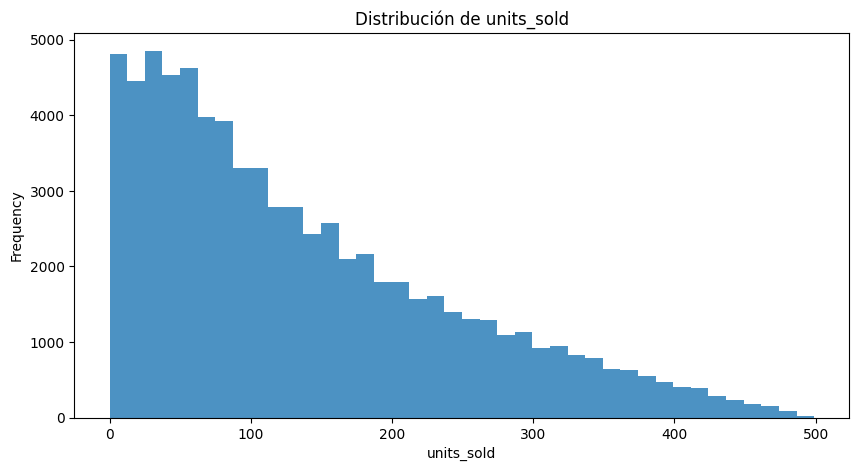

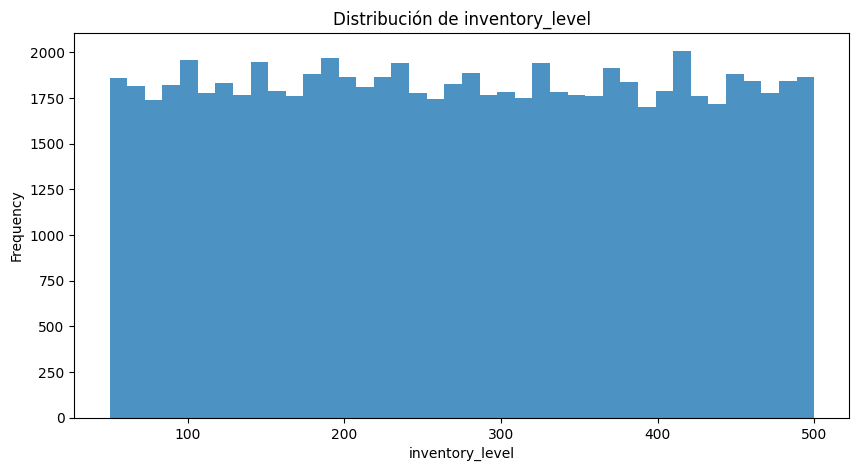

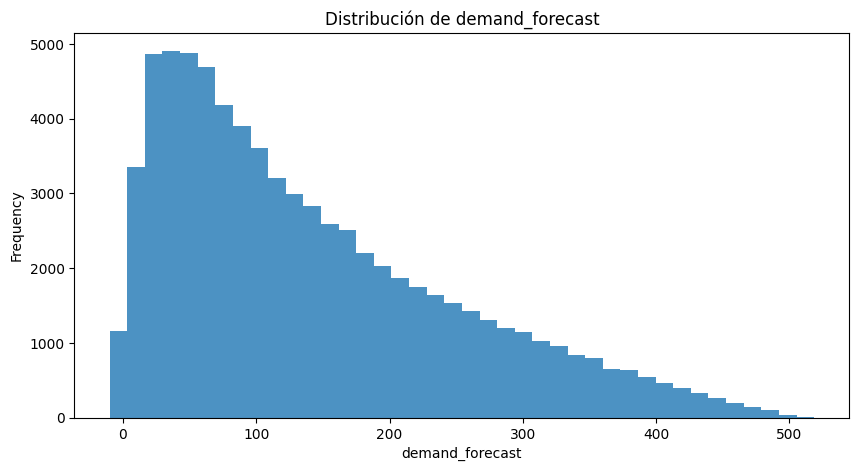

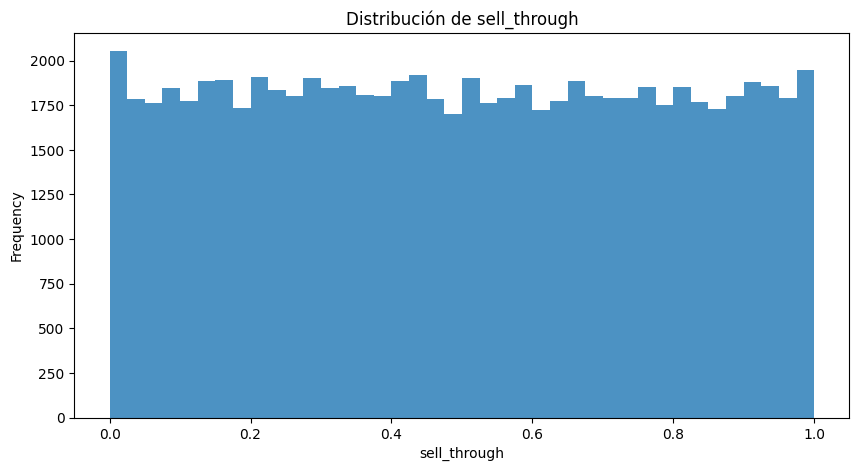

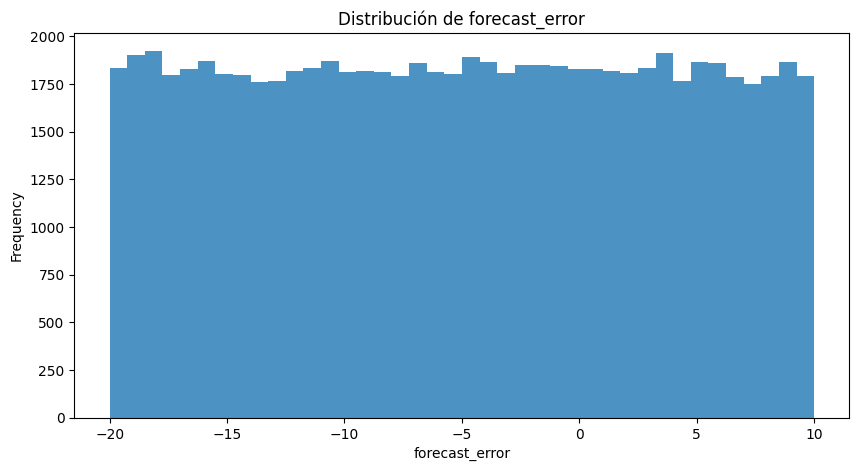

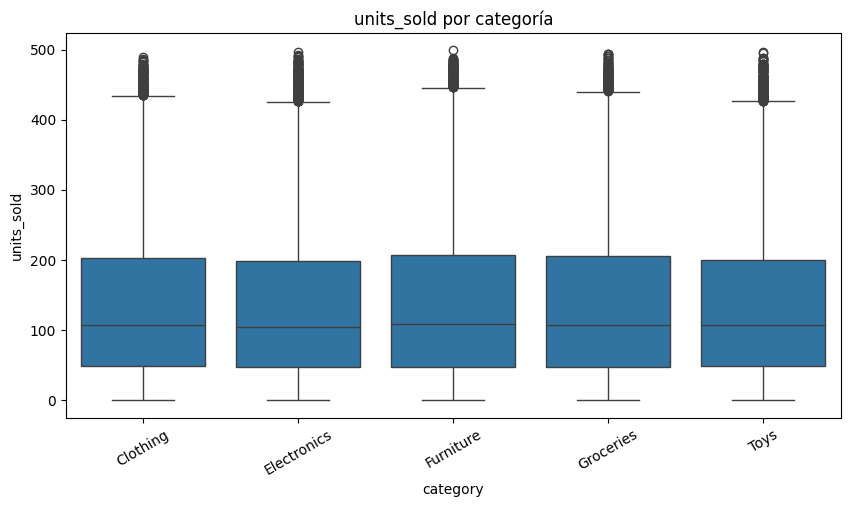

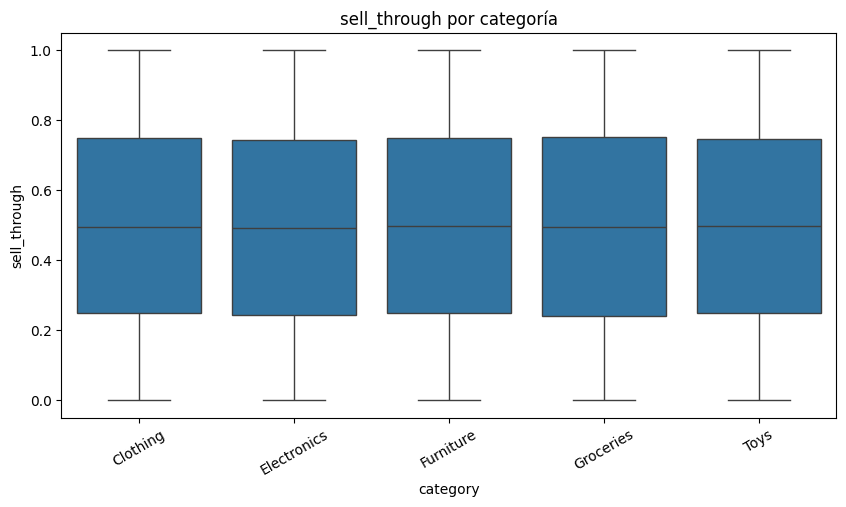

In [ ]:
# ============================
# 4) Distribuciones & Outliers
# ============================
num_cols = [c for c in ["units_sold","inventory_level","demand_forecast","sell_through","forecast_error","abs_perc_err"] if c in df.columns]

for col in num_cols:
    fig, ax = plt.subplots()
    df[col].dropna().plot(kind="hist", bins=40, alpha=0.8, ax=ax)
    ax.set_title(f"Distribución de {col}")
    ax.set_xlabel(col)
    plt.show()

# Boxplots por categoría (si existen)
if "category" in df.columns:
    for col in ["units_sold","sell_through"]:
        if col in df.columns:
            plt.figure()
            sns.boxplot(data=df, x="category", y=col)
            plt.title(f"{col} por categoría")
            plt.xticks(rotation=30)
            plt.show()

## Series temporales de ventas


--- Iniciando análisis de ventas totales ---
. Columna 'yearmonth' creada a partir de 'date'
. Datos filtrados: excluido enero 2024. 24 meses restantes


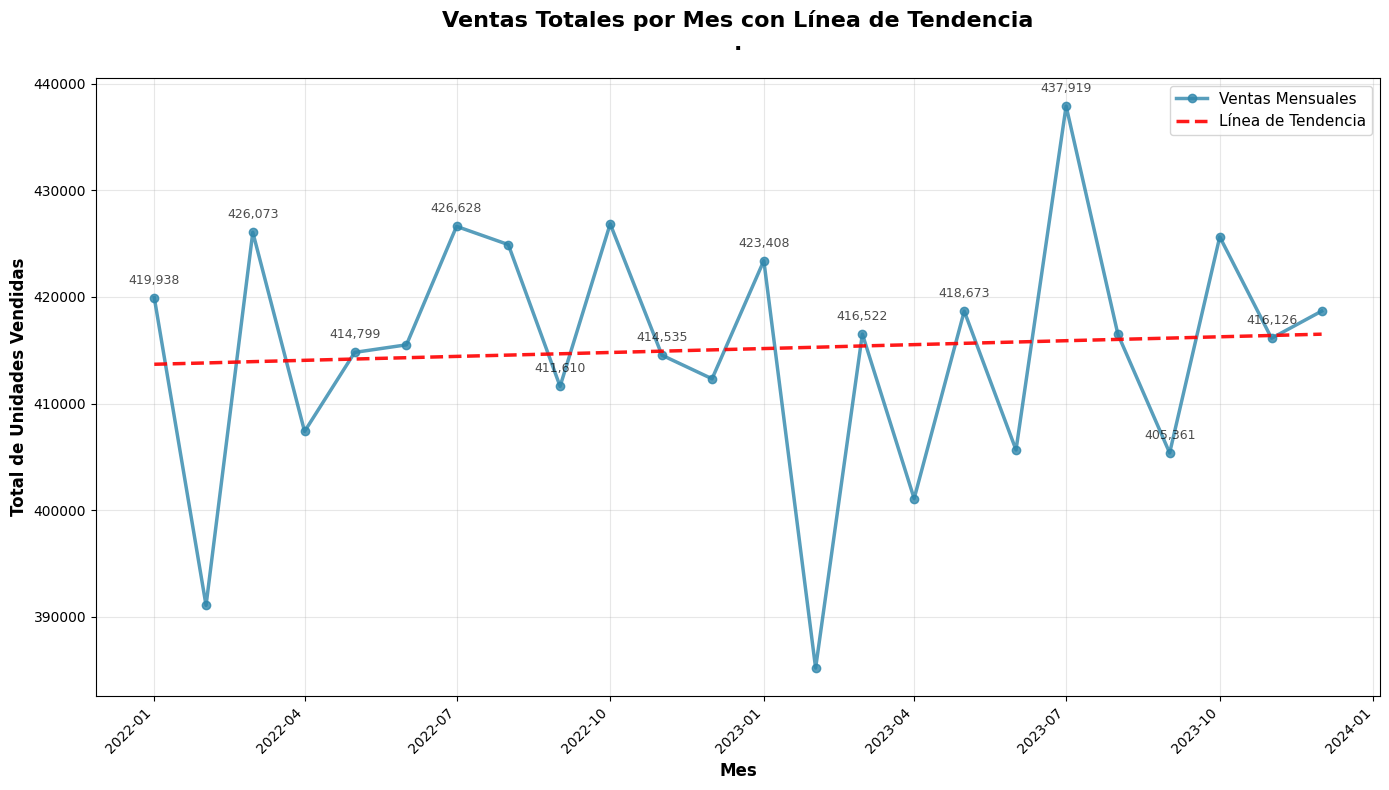

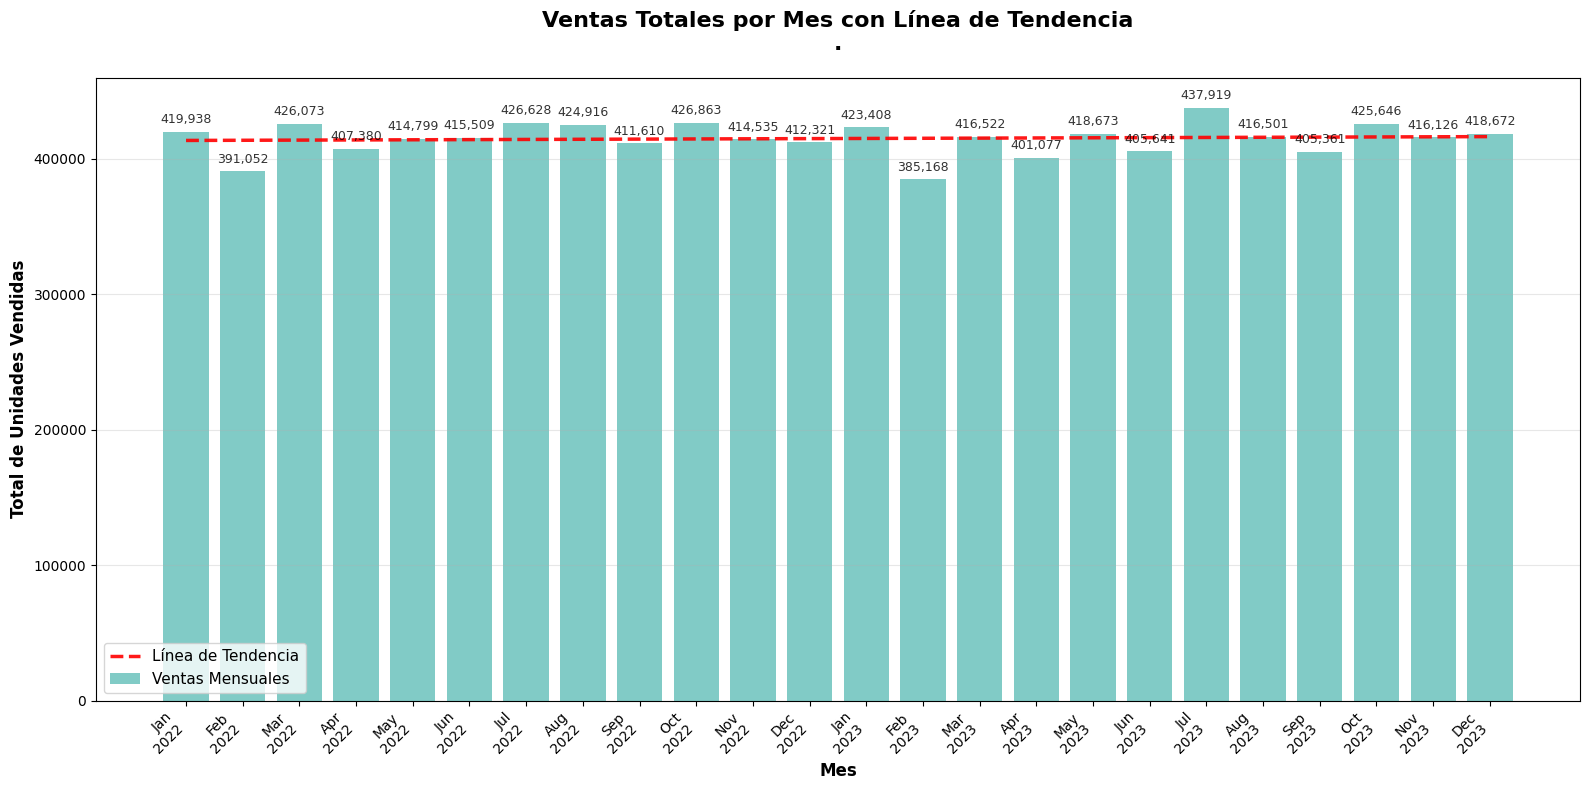


. ESTADÍSTICAS DE VENTAS MENSUALES (.):
   • Período analizado: 24 meses
   • Ventas totales: 9,962,338 unidades
   • Promedio mensual: 415,097 unidades
   • Mes con mayores ventas: July 2023 (437,919 unidades)
   • Tendencia: ↗️ CRECIENTE (pendiente: 122.77 unidades/mes)

--- Iniciando análisis de ventas por categoría ---


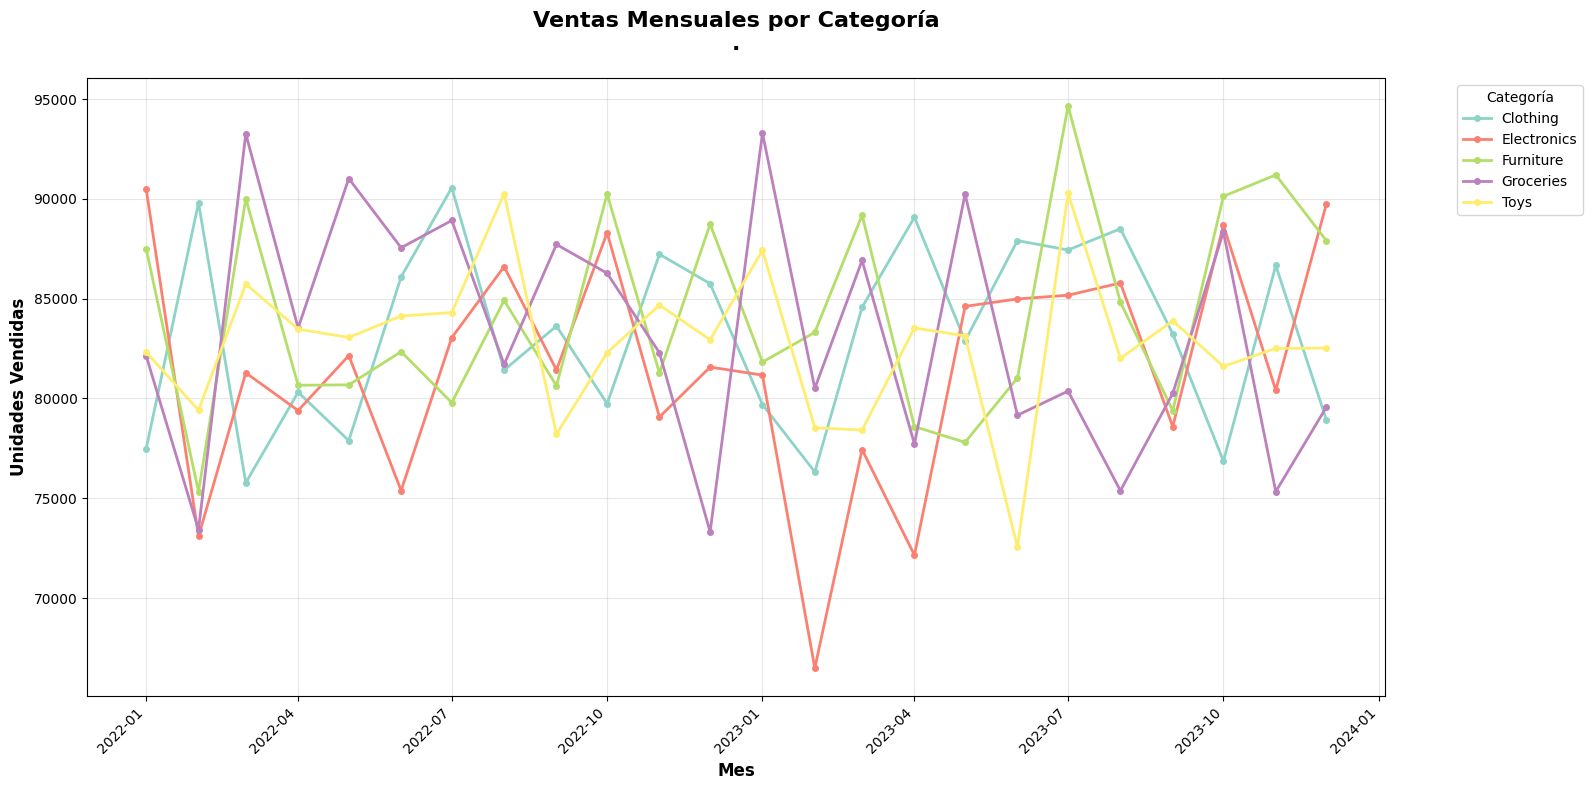


--- Iniciando análisis de ventas por tienda ---


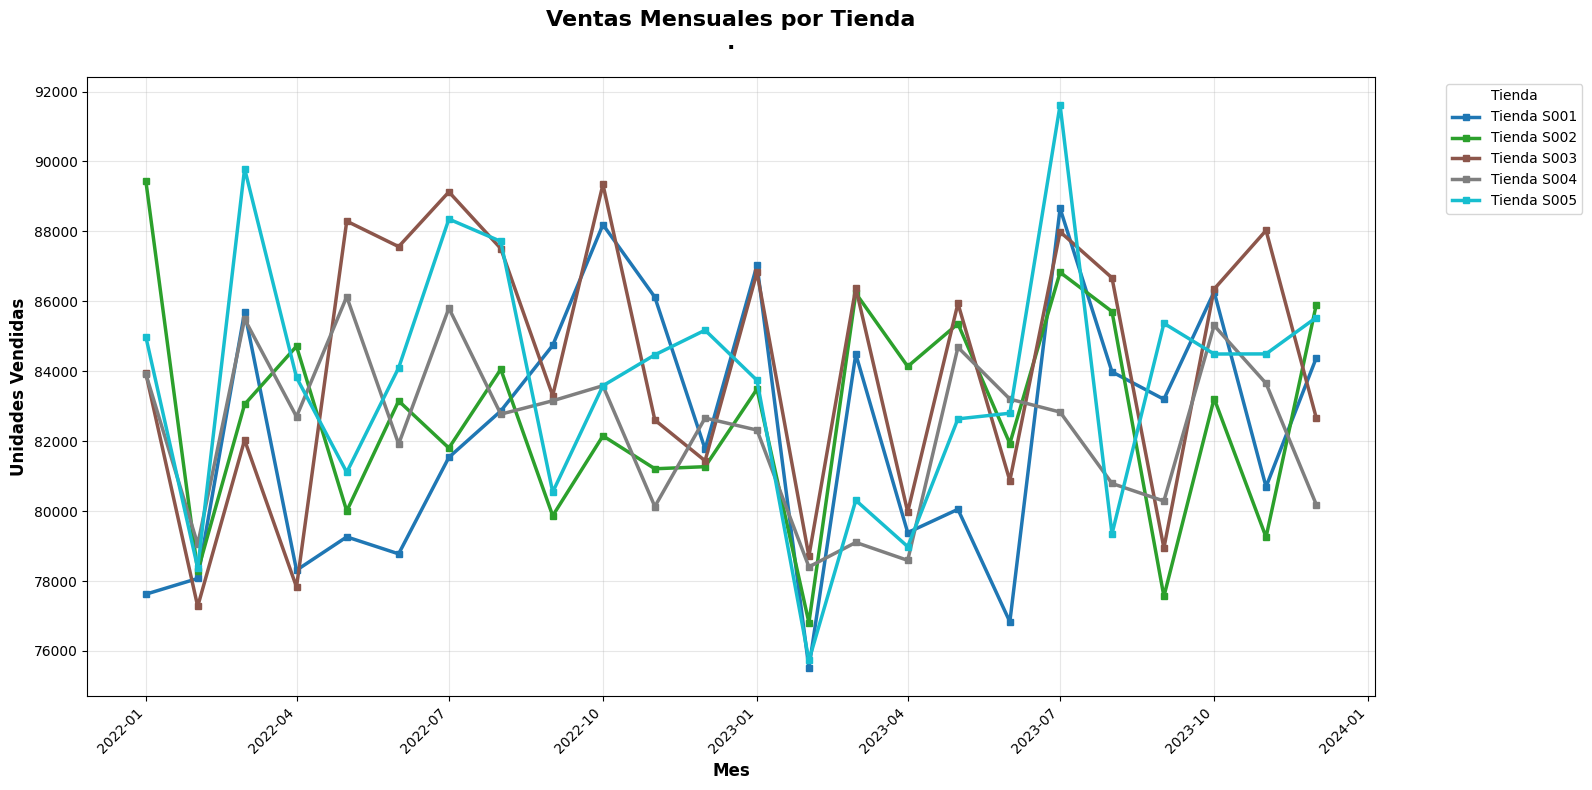


--- Análisis comparativo de tendencias por tienda ---


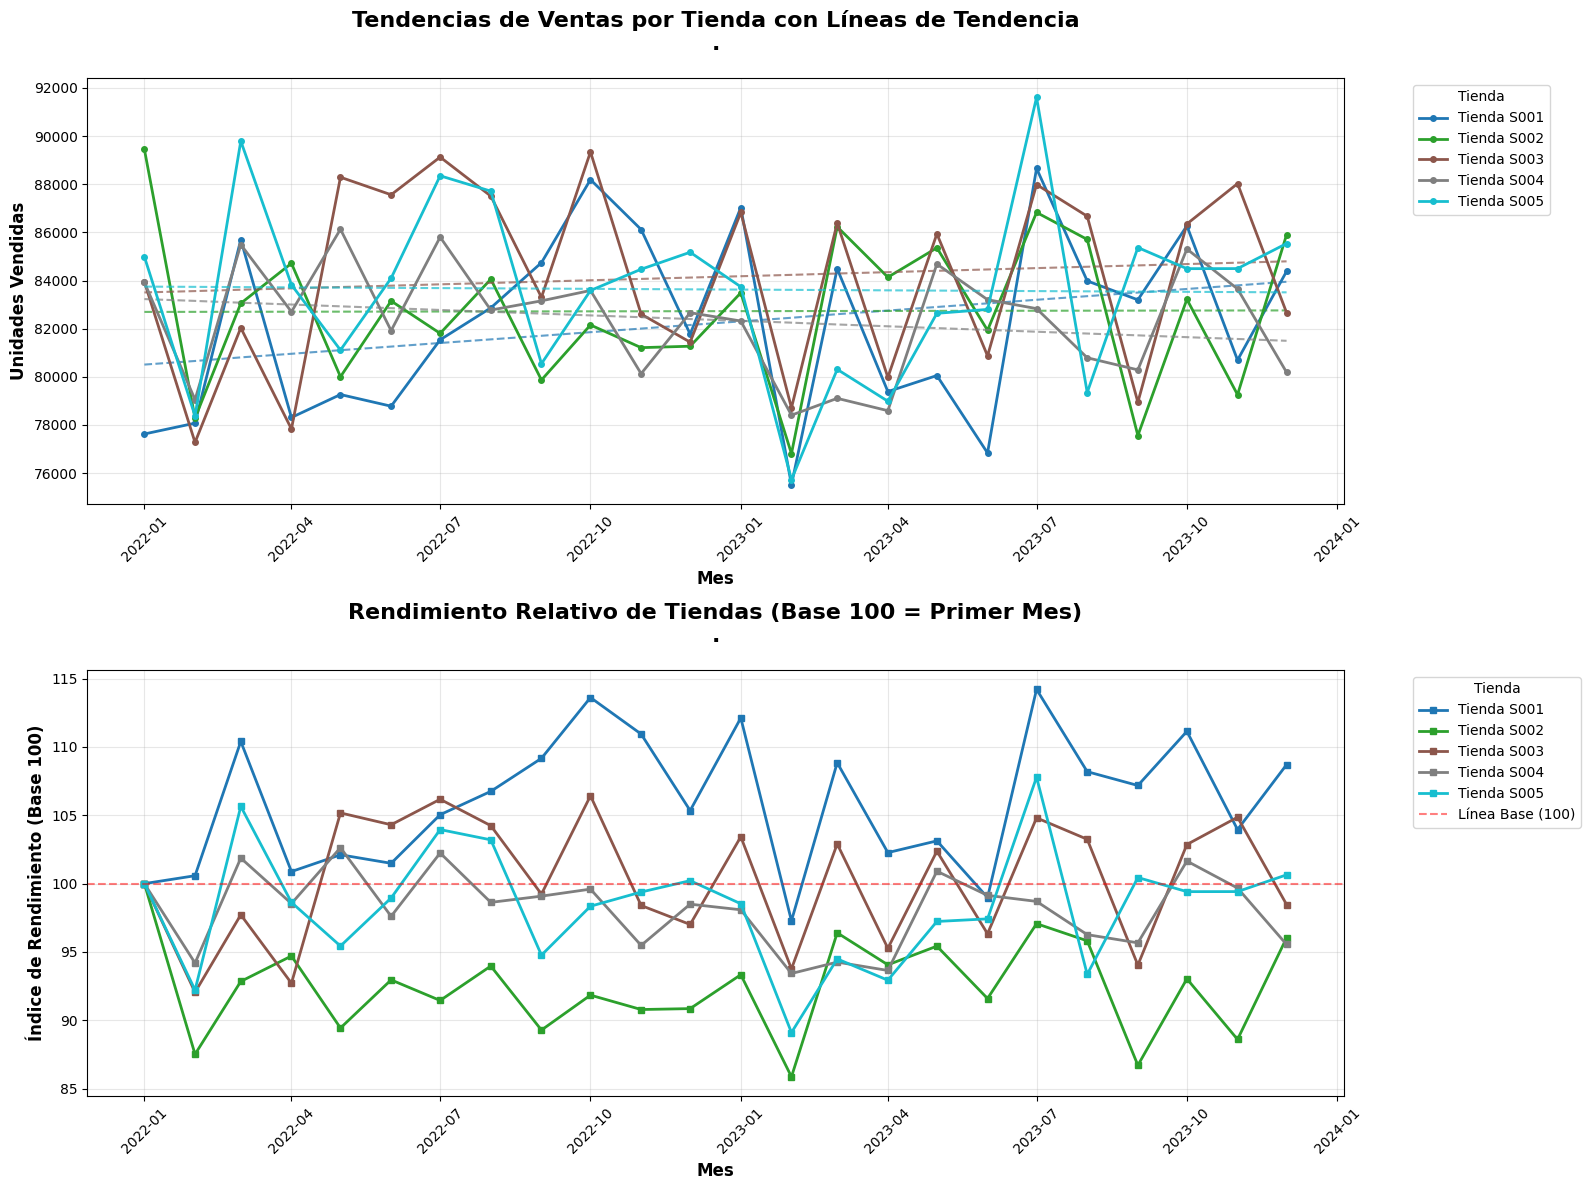


. ANÁLISIS DE TENDENCIAS POR TIENDA (.):
   RANKING POR TENDENCIA DE CRECIMIENTO:
   1. Tienda S001: ↗️ CRECIENTE (pendiente: 149.61)
      • Ventas totales: 1,973,472 unidades
      • Promedio mensual: 82,228 unidades
      • Crecimiento total: +8.7%
   2. Tienda S003: ↗️ CRECIENTE (pendiente: 56.14)
      • Ventas totales: 2,019,629 unidades
      • Promedio mensual: 84,151 unidades
      • Crecimiento total: -1.5%
   3. Tienda S002: ↗️ CRECIENTE (pendiente: 2.70)
      • Ventas totales: 1,985,451 unidades
      • Promedio mensual: 82,727 unidades
      • Crecimiento total: -4.0%
   4. Tienda S005: ↘️ DECRECIENTE (pendiente: -10.33)
      • Ventas totales: 2,007,084 unidades
      • Promedio mensual: 83,628 unidades
      • Crecimiento total: +0.6%
   5. Tienda S004: ↘️ DECRECIENTE (pendiente: -75.35)
      • Ventas totales: 1,976,702 unidades
      • Promedio mensual: 82,363 unidades
      • Crecimiento total: -4.5%

. ESTADÍSTICAS POR TIENDA (.):
   • Tienda S001: 1,973,472 unidad

In [ ]:
# ANÁLISIS DE VENTAS TOTALES - CORREGIDO Y . (.)

if 'df' in locals():
    print("\n--- Iniciando análisis de ventas totales ---")

    # VERIFICAR Y CREAR COLUMNA YEARMONTH SI NO EXISTE
    if 'yearmonth' not in df.columns and 'date' in df.columns:
        # Crear columna yearmonth a partir de date
        df['yearmonth'] = df['date'].dt.to_period('M')
        print(". Columna 'yearmonth' creada a partir de 'date'")

    # 1. PREPARACIÓN DE DATOS Y CÁLCULO DE TENDENCIA - .
    monthly_sales = df.groupby('yearmonth')['units_sold'].sum().reset_index()
    monthly_sales['yearmonth'] = monthly_sales['yearmonth'].dt.to_timestamp()
    monthly_sales = monthly_sales.sort_values('yearmonth')

    # FILTRAR: Excluir enero de 2024
    monthly_sales = monthly_sales[~((monthly_sales['yearmonth'].dt.year == 2024) &
                                  (monthly_sales['yearmonth'].dt.month == 1))]
    print(f". Datos filtrados: excluido enero 2024. {len(monthly_sales)} meses restantes")

    x_numeric = np.arange(len(monthly_sales))
    z = np.polyfit(x_numeric, monthly_sales['units_sold'], 1)
    p = np.poly1d(z)

    # 2. GRÁFICO DE LÍNEAS DE VENTAS TOTALES - .
    plt.figure(figsize=(14, 8))
    ax1 = plt.gca()

    # Gráfico principal de líneas
    plt.plot(monthly_sales['yearmonth'], monthly_sales['units_sold'],
             marker='o', linewidth=2.5, markersize=6,
             label='Ventas Mensuales', color='#2E86AB', alpha=0.8)

    # Línea de tendencia
    plt.plot(monthly_sales['yearmonth'], p(x_numeric),
             "r--", linewidth=2.5, label="Línea de Tendencia", alpha=0.9)

    # Mejorar el formato del gráfico
    plt.title('Ventas Totales por Mes con Línea de Tendencia\n.',
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Mes', fontsize=12, fontweight='bold')
    plt.ylabel('Total de Unidades Vendidas', fontsize=12, fontweight='bold')

    # Formatear ejes
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=11)

    # Añadir anotaciones
    for i, (fecha, ventas) in enumerate(zip(monthly_sales['yearmonth'], monthly_sales['units_sold'])):
        if i % 2 == 0:  # Mostrar cada segunda etiqueta para evitar saturación
            plt.annotate(f'{ventas:,.0f}',
                        (fecha, ventas),
                        textcoords="offset points",
                        xytext=(0,10),
                        ha='center',
                        fontsize=9,
                        alpha=0.7)

    plt.tight_layout()
    plt.show()

    # 3. GRÁFICO DE BARRAS DE VENTAS TOTALES - .
    plt.figure(figsize=(16, 8))

    # Crear etiquetas más legibles para los meses
    etiquetas_meses = monthly_sales['yearmonth'].dt.strftime('%b\n%Y')

    # Gráfico de barras
    barras = plt.bar(etiquetas_meses, monthly_sales['units_sold'],
                    color='#4CB5AE', alpha=0.7, label='Ventas Mensuales')

    # Línea de tendencia en gráfico de barras
    plt.plot(etiquetas_meses, p(x_numeric), "r--", linewidth=2.5,
             label="Línea de Tendencia", alpha=0.9)

    plt.title('Ventas Totales por Mes con Línea de Tendencia\n.',
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Mes', fontsize=12, fontweight='bold')
    plt.ylabel('Total de Unidades Vendidas', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3, axis='y')

    # Añadir valores en las barras
    for barra, valor in zip(barras, monthly_sales['units_sold']):
        altura = barra.get_height()
        plt.text(barra.get_x() + barra.get_width()/2., altura + altura*0.01,
                f'{valor:,.0f}', ha='center', va='bottom', fontsize=9, alpha=0.8)

    plt.tight_layout()
    plt.show()

    # 4. ESTADÍSTICAS ADICIONALES
    print(f"\n. ESTADÍSTICAS DE VENTAS MENSUALES (.):")
    print(f"   • Período analizado: {len(monthly_sales)} meses")
    print(f"   • Ventas totales: {monthly_sales['units_sold'].sum():,.0f} unidades")
    print(f"   • Promedio mensual: {monthly_sales['units_sold'].mean():,.0f} unidades")
    print(f"   • Mes con mayores ventas: {monthly_sales.loc[monthly_sales['units_sold'].idxmax(), 'yearmonth'].strftime('%B %Y')} "
          f"({monthly_sales['units_sold'].max():,.0f} unidades)")
    print(f"   • Tendencia: {'↗️ CRECIENTE' if z[0] > 0 else '↘️ DECRECIENTE' if z[0] < 0 else '➡️ ESTABLE'} "
          f"(pendiente: {z[0]:.2f} unidades/mes)")

# ANÁLISIS DE VENTAS MENSUALES POR CATEGORÍA - . (.)

if 'df' in locals():
    print("\n--- Iniciando análisis de ventas por categoría ---")

    # VERIFICAR COLUMNA YEARMONTH
    if 'yearmonth' not in df.columns and 'date' in df.columns:
        df['yearmonth'] = df['date'].dt.to_period('M')

    # 1. PREPARACIÓN DE DATOS - .
    category_monthly_sales = df.groupby(['yearmonth', 'category'])['units_sold'].sum().reset_index()
    category_monthly_sales['yearmonth'] = category_monthly_sales['yearmonth'].dt.to_timestamp()
    category_monthly_sales = category_monthly_sales.sort_values(['yearmonth', 'category'])

    # FILTRAR: Excluir enero de 2024
    category_monthly_sales = category_monthly_sales[~((category_monthly_sales['yearmonth'].dt.year == 2024) &
                                                    (category_monthly_sales['yearmonth'].dt.month == 1))]

    # 2. GRÁFICO DE LÍNEAS - .
    plt.figure(figsize=(16, 8))

    # Usar matplotlib directamente para mejor control
    categorias = category_monthly_sales['category'].unique()
    colores = plt.cm.Set3(np.linspace(0, 1, len(categorias)))

    for i, categoria in enumerate(categorias):
        datos_categoria = category_monthly_sales[category_monthly_sales['category'] == categoria]
        plt.plot(datos_categoria['yearmonth'], datos_categoria['units_sold'],
                marker='o', linewidth=2, markersize=4,
                label=categoria, color=colores[i])

    plt.title('Ventas Mensuales por Categoría\n.',
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Mes', fontsize=12, fontweight='bold')
    plt.ylabel('Unidades Vendidas', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# ANÁLISIS MENSUAL DE VENTAS POR TIENDA - . (.)

if 'df' in locals():
    print("\n--- Iniciando análisis de ventas por tienda ---")

    # VERIFICAR COLUMNA YEARMONTH
    if 'yearmonth' not in df.columns and 'date' in df.columns:
        df['yearmonth'] = df['date'].dt.to_period('M')

    # 1. PREPARACIÓN DE DATOS - .
    store_monthly_sales = df.groupby(['yearmonth', 'store_id'])['units_sold'].sum().reset_index()
    store_monthly_sales['yearmonth'] = store_monthly_sales['yearmonth'].dt.to_timestamp()
    store_monthly_sales = store_monthly_sales.sort_values(['yearmonth', 'store_id'])

    # FILTRAR: Excluir enero de 2024
    store_monthly_sales = store_monthly_sales[~((store_monthly_sales['yearmonth'].dt.year == 2024) &
                                              (store_monthly_sales['yearmonth'].dt.month == 1))]

    # 2. GRÁFICO DE LÍNEAS POR TIENDA - .
    plt.figure(figsize=(16, 8))

    tiendas = store_monthly_sales['store_id'].unique()
    colores_tiendas = plt.cm.tab10(np.linspace(0, 1, len(tiendas)))

    for i, tienda in enumerate(tiendas):
        datos_tienda = store_monthly_sales[store_monthly_sales['store_id'] == tienda]
        plt.plot(datos_tienda['yearmonth'], datos_tienda['units_sold'],
                marker='s', linewidth=2.5, markersize=5,
                label=f'Tienda {tienda}', color=colores_tiendas[i])

    plt.title('Ventas Mensuales por Tienda\n.',
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Mes', fontsize=12, fontweight='bold')
    plt.ylabel('Unidades Vendidas', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 3. GRÁFICO COMPARATIVO ENTRE TIENDAS - .
    print("\n--- Análisis comparativo de tendencias por tienda ---")

    # Crear figura con subplots para análisis comparativo
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

    # Subplot 1: Tendencias individuales por tienda con líneas de tendencia
    for i, tienda in enumerate(tiendas):
        datos_tienda = store_monthly_sales[store_monthly_sales['store_id'] == tienda]

        if len(datos_tienda) > 1:
            # Calcular tendencia para cada tienda
            x_tienda = np.arange(len(datos_tienda))
            z_tienda = np.polyfit(x_tienda, datos_tienda['units_sold'], 1)
            p_tienda = np.poly1d(z_tienda)

            # Gráfico de datos reales
            ax1.plot(datos_tienda['yearmonth'], datos_tienda['units_sold'],
                    marker='o', linewidth=2, markersize=4,
                    label=f'Tienda {tienda}', color=colores_tiendas[i])

            # Línea de tendencia para cada tienda
            ax1.plot(datos_tienda['yearmonth'], p_tienda(x_tienda),
                    '--', linewidth=1.5, alpha=0.7, color=colores_tiendas[i])

    ax1.set_title('Tendencias de Ventas por Tienda con Líneas de Tendencia\n.',
                 fontsize=16, fontweight='bold', pad=20)
    ax1.set_xlabel('Mes', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Unidades Vendidas', fontsize=12, fontweight='bold')
    ax1.tick_params(axis='x', rotation=45)
    ax1.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)

    # Subplot 2: Comparación de rendimiento relativo (índice base 100)
    ax2.set_title('Rendimiento Relativo de Tiendas (Base 100 = Primer Mes)\n.',
                 fontsize=16, fontweight='bold', pad=20)

    for i, tienda in enumerate(tiendas):
        datos_tienda = store_monthly_sales[store_monthly_sales['store_id'] == tienda].sort_values('yearmonth')

        if len(datos_tienda) > 1:
            # Calcular índice base 100
            primer_valor = datos_tienda['units_sold'].iloc[0]
            datos_tienda['indice'] = (datos_tienda['units_sold'] / primer_valor) * 100

            ax2.plot(datos_tienda['yearmonth'], datos_tienda['indice'],
                    marker='s', linewidth=2, markersize=4,
                    label=f'Tienda {tienda}', color=colores_tiendas[i])

    ax2.axhline(y=100, color='red', linestyle='--', alpha=0.5, label='Línea Base (100)')
    ax2.set_xlabel('Mes', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Índice de Rendimiento (Base 100)', fontsize=12, fontweight='bold')
    ax2.tick_params(axis='x', rotation=45)
    ax2.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # 4. ANÁLISIS DE TENDENCIAS POR TIENDA
    print(f"\n. ANÁLISIS DE TENDENCIAS POR TIENDA (.):")

    tendencias_tiendas = {}
    for tienda in tiendas:
        datos_tienda = store_monthly_sales[store_monthly_sales['store_id'] == tienda].sort_values('yearmonth')

        if len(datos_tienda) > 1:
            x_tienda = np.arange(len(datos_tienda))
            z_tienda = np.polyfit(x_tienda, datos_tienda['units_sold'], 1)

            tendencias_tiendas[tienda] = {
                'pendiente': z_tienda[0],
                'ventas_totales': datos_tienda['units_sold'].sum(),
                'promedio_mensual': datos_tienda['units_sold'].mean(),
                'crecimiento_porcentual': ((datos_tienda['units_sold'].iloc[-1] - datos_tienda['units_sold'].iloc[0]) / datos_tienda['units_sold'].iloc[0]) * 100
            }

    # Ordenar tiendas por pendiente de tendencia (mejor desempeño primero)
    tiendas_ordenadas = sorted(tendencias_tiendas.items(), key=lambda x: x[1]['pendiente'], reverse=True)

    print("   RANKING POR TENDENCIA DE CRECIMIENTO:")
    for i, (tienda, datos) in enumerate(tiendas_ordenadas, 1):
        tendencia = "↗️ CRECIENTE" if datos['pendiente'] > 0 else "↘️ DECRECIENTE" if datos['pendiente'] < 0 else "➡️ ESTABLE"
        print(f"   {i}. Tienda {tienda}: {tendencia} (pendiente: {datos['pendiente']:.2f})")
        print(f"      • Ventas totales: {datos['ventas_totales']:,.0f} unidades")
        print(f"      • Promedio mensual: {datos['promedio_mensual']:,.0f} unidades")
        print(f"      • Crecimiento total: {datos['crecimiento_porcentual']:+.1f}%")

    # ESTADÍSTICAS POR TIENDA
    print(f"\n. ESTADÍSTICAS POR TIENDA (.):")
    for tienda in tiendas:
        datos_tienda = store_monthly_sales[store_monthly_sales['store_id'] == tienda]
        ventas_totales = datos_tienda['units_sold'].sum()
        promedio_mensual = datos_tienda['units_sold'].mean()
        print(f"   • Tienda {tienda}: {ventas_totales:,.0f} unidades totales "
              f"({promedio_mensual:,.0f} promedio mensual)")

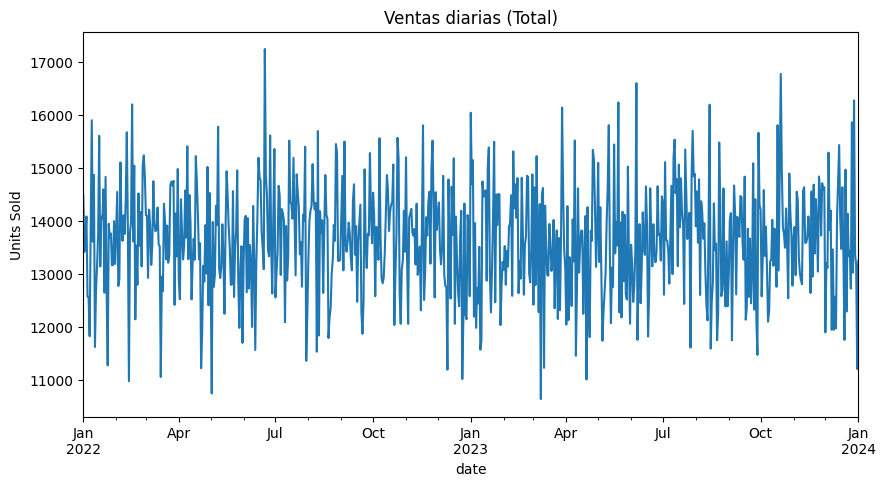

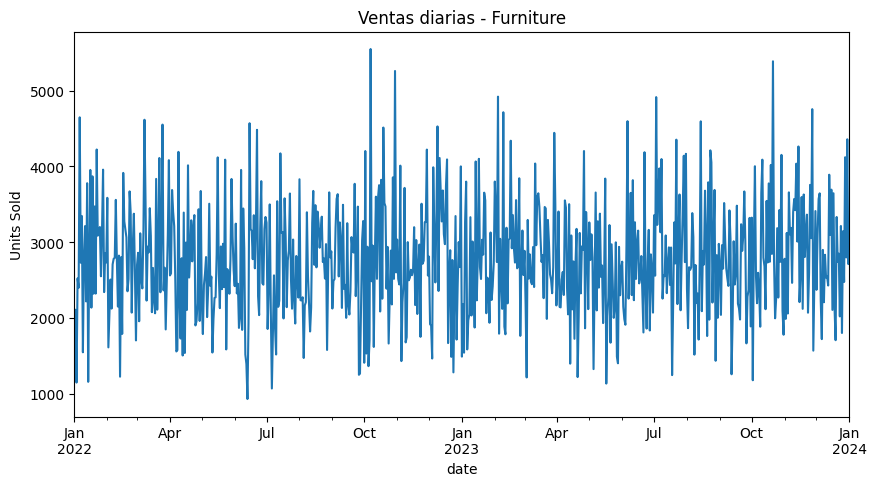

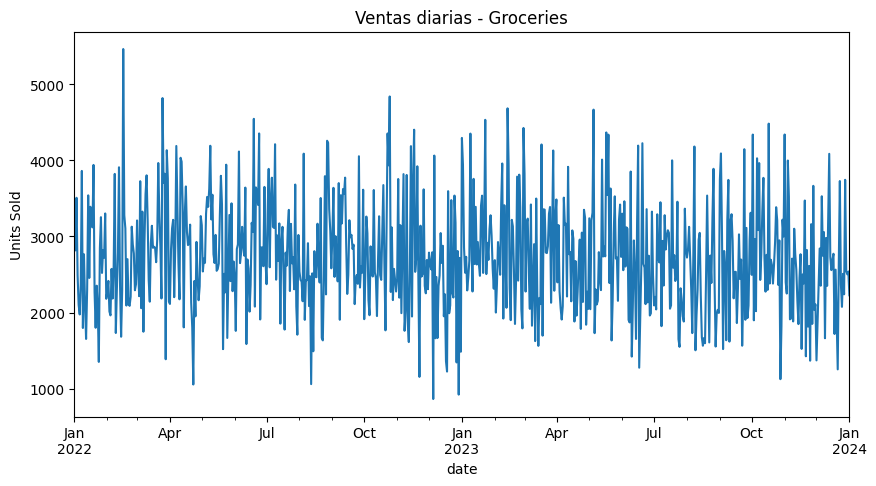

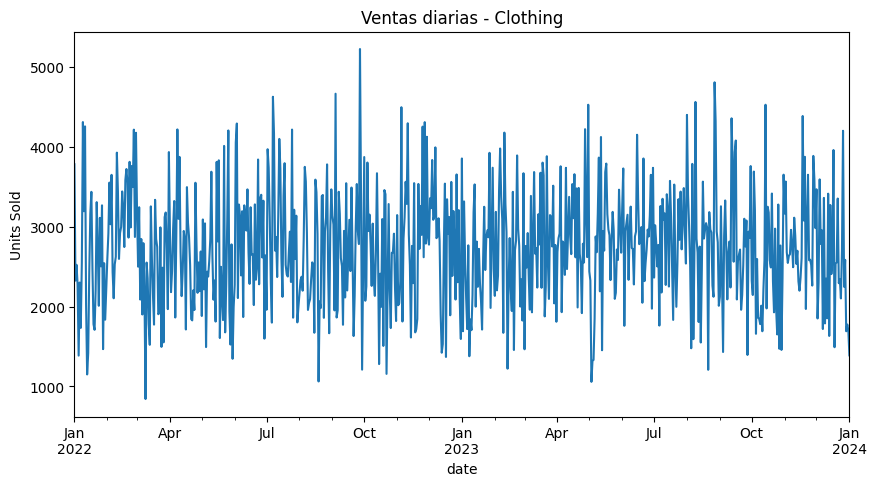

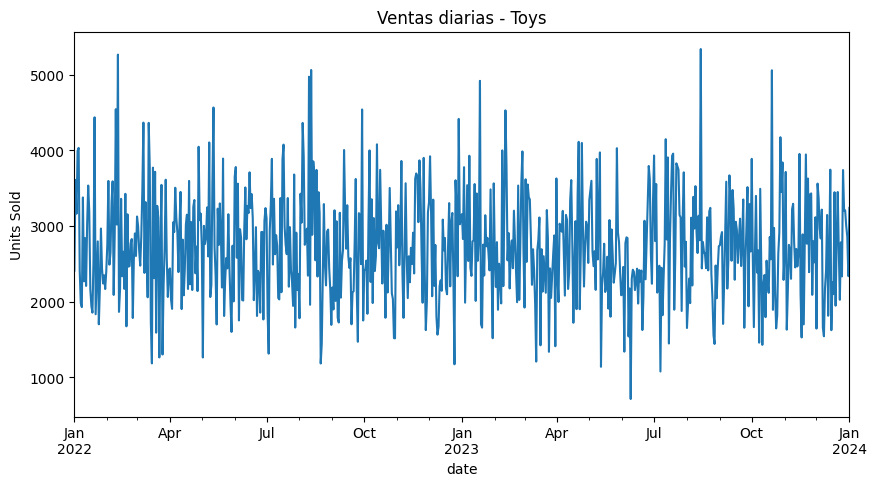

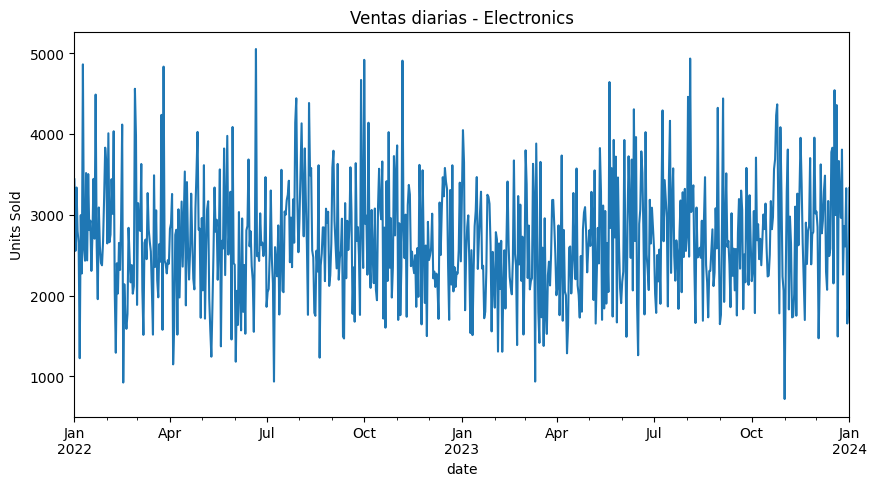

In [ ]:
# =========================
# 5) Tendencias temporales
# =========================
# Serie agregada (total diario)
if {"date","units_sold"}.issubset(df.columns):
    s_daily = df.groupby("date", as_index=True)["units_sold"].sum()
    ax = s_daily.plot()
    ax.set_title("Ventas diarias (Total)")
    ax.set_ylabel("Units Sold")
    plt.show()

# Por categoría (top 6)
if {"date","category","units_sold"}.issubset(df.columns):
    top_cats = df.groupby("category")["units_sold"].sum().sort_values(ascending=False).head(6).index
    tmp = df[df["category"].isin(top_cats)].groupby(["date","category"])["units_sold"].sum().reset_index()
    for cat in top_cats:
        sub = tmp[tmp["category"]==cat].set_index("date")["units_sold"]
        ax = sub.plot()
        ax.set_title(f"Ventas diarias - {cat}")
        ax.set_ylabel("Units Sold")
        plt.show()

# Estacionalidad por día de la semana / mes
if {"units_sold","dow"}.issubset(df.columns):
    display(df.groupby("dow")["units_sold"].agg(["count","mean","median"]).round(2))
    ax = df.groupby("dow")["units_sold"].mean().plot(kind="bar")
    ax.set_title("Promedio Units Sold por día de la semana (0=Lun)")
    plt.show()

if {"units_sold","month"}.issubset(df.columns):
    ax = df.groupby("month")["units_sold"].mean().plot(kind="bar")
    ax.set_title("Promedio Units Sold por mes")
    plt.show()

count    mean  median
holiday_promotion                       
0                  36747  136.51   107.0
1                  36353  136.42   108.0

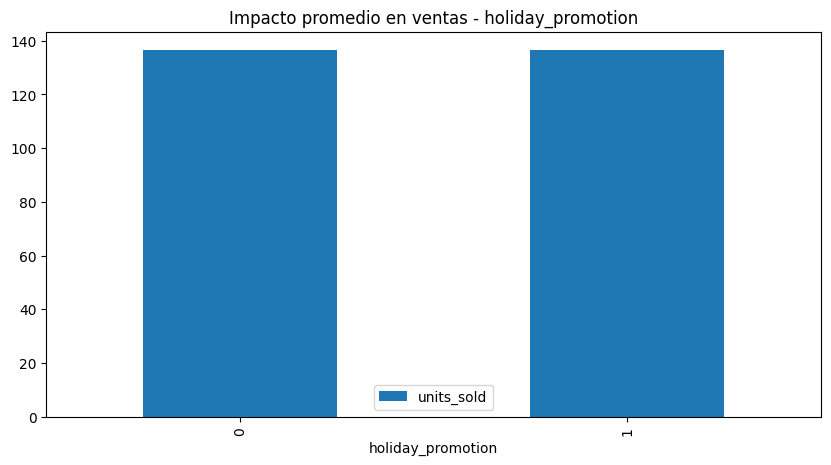

In [ ]:
# ============================
# 6) Impacto de eventos (promo/holiday)
# ============================
# Si hay una única bandera combinada:
flag_cols = [c for c in ["holiday_promotion","promotion","holiday"] if c in df.columns]
if flag_cols:
    for flag in flag_cols:
        g = df.groupby(flag)["units_sold"].agg(["count","mean","median"]).round(2)
        display(g)
        ax = df[[flag,"units_sold"]].groupby(flag).mean().plot(kind="bar")
        ax.set_title(f"Impacto promedio en ventas - {flag}")
        plt.show()

# Uplift relativo (promedios)
def uplift(a, b):
    return (a - b) / b if b not in [0, np.nan] else np.nan

if "promotion" in df.columns:
    promo_mean = df.loc[df["promotion"]==1, "units_sold"].mean()
    nopromo_mean = df.loc[df["promotion"]==0, "units_sold"].mean()
    print("Uplift por promoción (%):", round(100*uplift(promo_mean, nopromo_mean), 2))

if "holiday" in df.columns:
    h_mean = df.loc[df["holiday"]==1, "units_sold"].mean()
    nh_mean = df.loc[df["holiday"]==0, "units_sold"].mean()
    print("Uplift por feriado (%):", round(100*uplift(h_mean, nh_mean), 2))


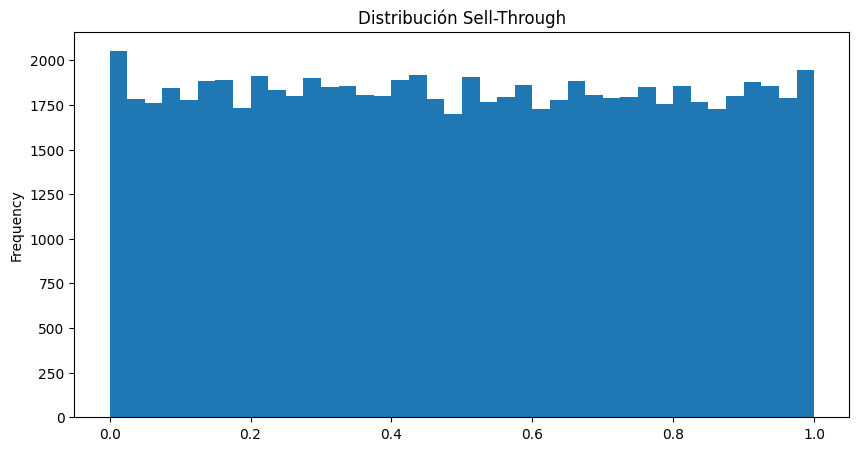

In [ ]:
# =======================================
# 7) Inventario: stockouts y sell-through
# =======================================
if "stockout_flag" in df.columns:
    rate = df["stockout_flag"].mean()
    print(f"Tasa global de stockout: {rate:.2%}")

    if "category" in df.columns:
        cat_rate = df.groupby("category")["stockout_flag"].mean().sort_values(ascending=False)
        display(cat_rate.to_frame("stockout_rate").style.format("{:.2%}"))
        ax = cat_rate.plot(kind="bar")
        ax.set_title("Stockout rate por categoría")
        plt.show()

if "sell_through" in df.columns:
    ax = df["sell_through"].plot(kind="hist", bins=40)
    ax.set_title("Distribución Sell-Through")
    plt.show()


units_sold  inventory_level  demand_forecast  sell_through
units_sold            1.000            0.590            0.997         0.726
inventory_level       0.590            1.000            0.589        -0.006
demand_forecast       0.997            0.589            1.000         0.723
sell_through          0.726           -0.006            0.723         1.000

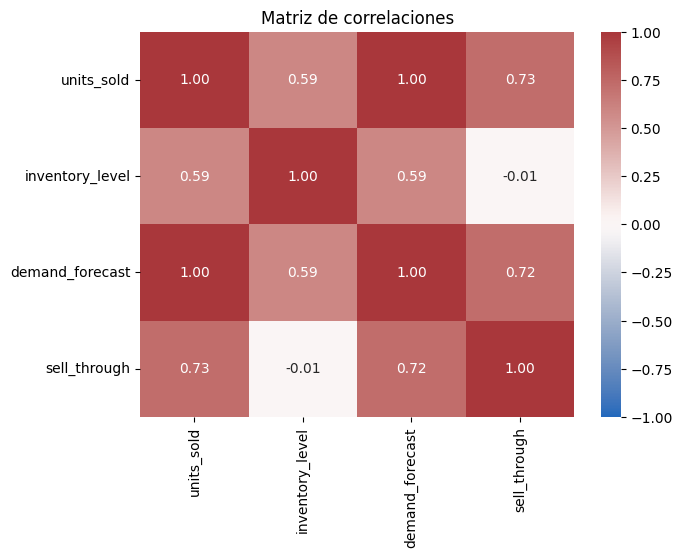

In [ ]:
# ====================
# 8) Correlaciones
# ====================
cand = [c for c in ["units_sold","inventory_level","demand_forecast","sell_through","is_weekend"] if c in df.columns]
corr = df[cand].corr()
display(corr.round(3))

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, fmt=".2f", vmin=-1, vmax=1, cmap="vlag")
plt.title("Matriz de correlaciones")
plt.show()

In [ ]:
# ======================
# 9) Resumen de hallazgos
# ======================
# Ejemplo de KPIs que puedes imprimir al final y luego incluir en tu reporte
summary = {}

if {"promotion","units_sold"}.issubset(df.columns):
    promo_mean = df.loc[df["promotion"]==1, "units_sold"].mean()
    nopromo_mean = df.loc[df["promotion"]==0, "units_sold"].mean()
    summary["uplift_promocion_%"] = round(100* (promo_mean - nopromo_mean) / nopromo_mean, 2)

if "stockout_flag" in df.columns:
    summary["stockout_rate_%"] = round(100*df["stockout_flag"].mean(), 2)

if {"units_sold","demand_forecast"}.issubset(df.columns):
    err = df["units_sold"] - df["demand_forecast"]
    summary["MAE"] = round(err.abs().mean(), 2)
    summary["RMSE"] = round(np.sqrt((err**2).mean()), 2)

summary_df = pd.DataFrame(summary, index=["valor"])
display(summary_df.T)


valor
MAE    8.34
RMSE  10.02

## Esudio previo al desarrollo de modelo predictivo de la demanda

In [ ]:
# Selecionando las variables numéricas relevantes para diseñar el modelo predictor de demanda
df_modelo = df.drop(columns=['date', 'store_id', 'product_id', 'category', 'region', 'weather_condition', 'seasonality', 'sell_through','forecast_error','abs_forecast_error','inventory_turnover'], axis=1)
# Renombrado de columnas a español
df_modelo = df_modelo.rename(columns={'inventory_level': 'Inventario',
                        'units_sold': 'Unidades vendidas',
                        'units_ordered': 'Unidades ordenadas',
                        'demand_forecast': 'Demanda',
                        'holiday_promotion': 'Promoción',
                        'competitor_pricing': 'Precio competencia',
                        'price':'Precio',
                        'discount':'Descuento'})
df_modelo

Inventario  Unidades vendidas  Unidades ordenadas  Demanda  Precio  \
0             231                127                  55   135.47   33.50   
1             204                150                  66   144.04   63.01   
2             102                 65                  51    74.02   27.99   
3             469                 61                 164    62.18   32.72   
4             166                 14                 135     9.26   73.64   
...           ...                ...                 ...      ...     ...   
73095          96                  8                 127    18.46   73.73   
73096         313                 51                 101    48.43   82.57   
73097         278                 36                 151    39.65   11.11   
73098         374                264                  21   270.52   53.14   
73099         117                  6                 165     2.33   78.39   

       Descuento Promoción  Precio competencia yearmonth  
0             20         0               29.69   2022-01  
1             20         0               66.16   2022-01  
2             10         1               31.32   2022-01  
3             10         1               34.74   2022-01  
4              0         0               68.95   2022-01  
...          ...       ...                 ...       ...  
73095         20         0               72.45   2024-01  
73096         10         0               83.78   2024-01  
73097         10         0               10.91   2024-01  
73098         20         0               55.80   2024-01  
73099         20         1               79.52   2024-01  

[73100 rows x 9 columns]

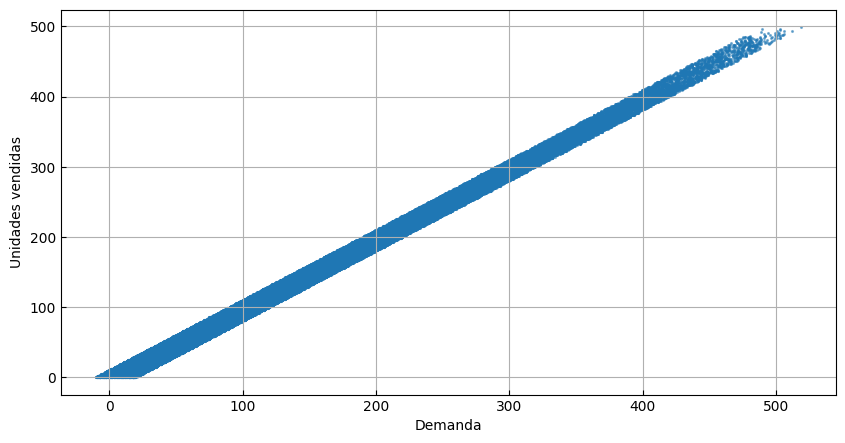

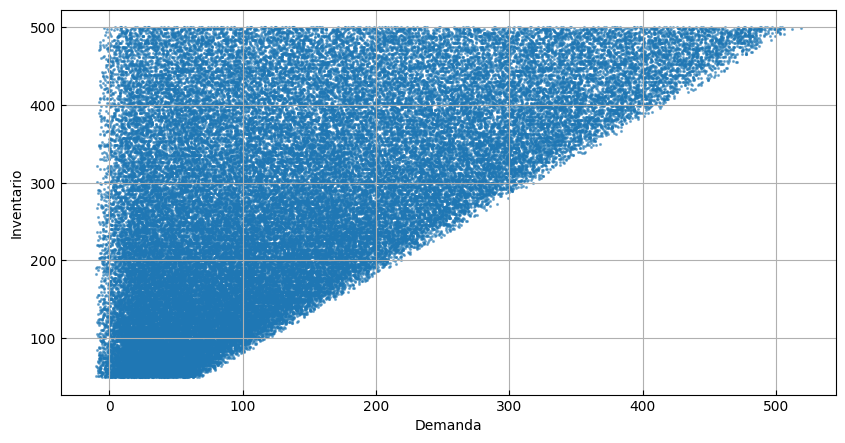

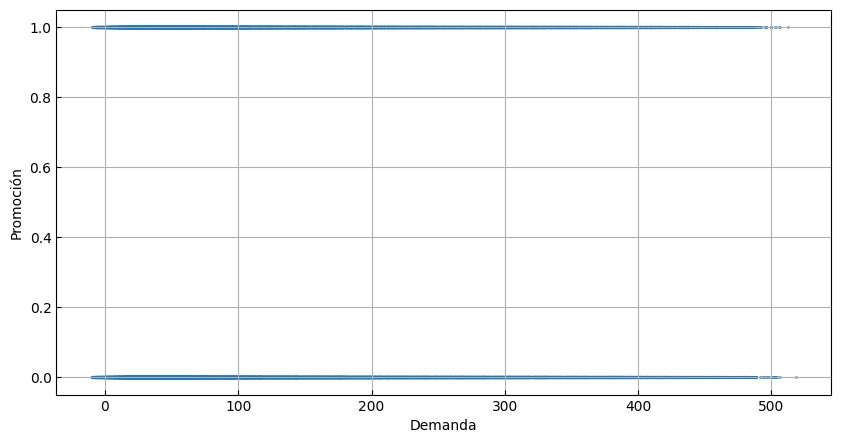

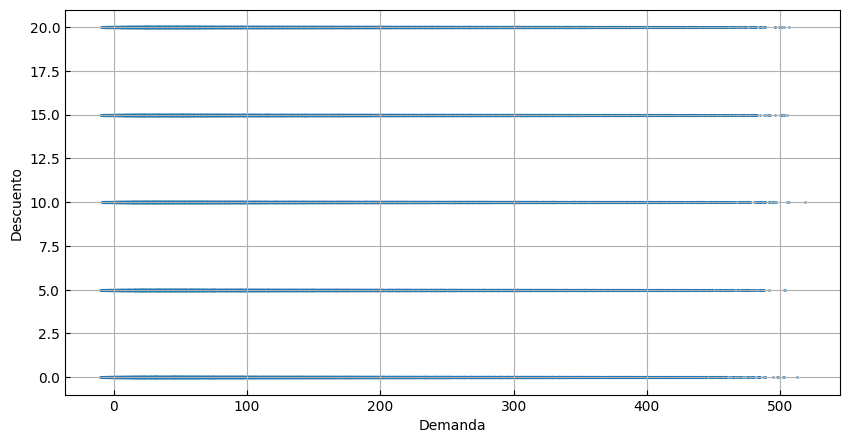

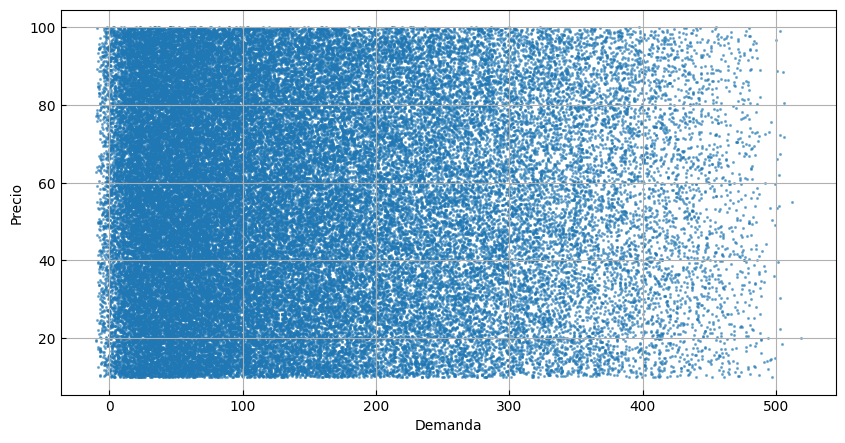

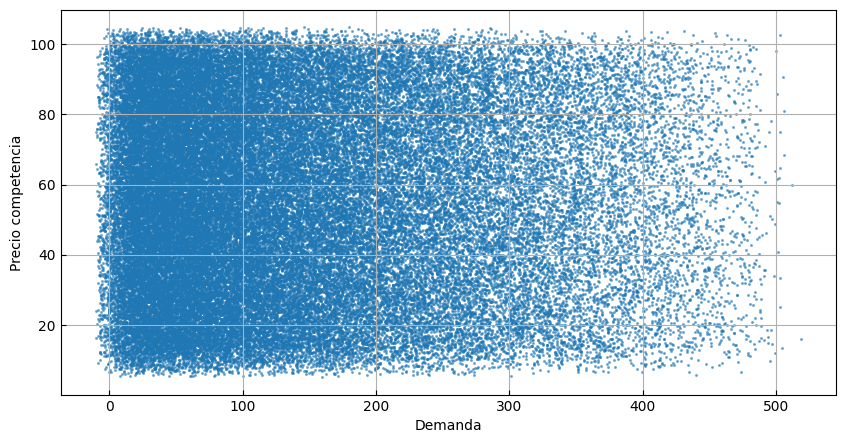

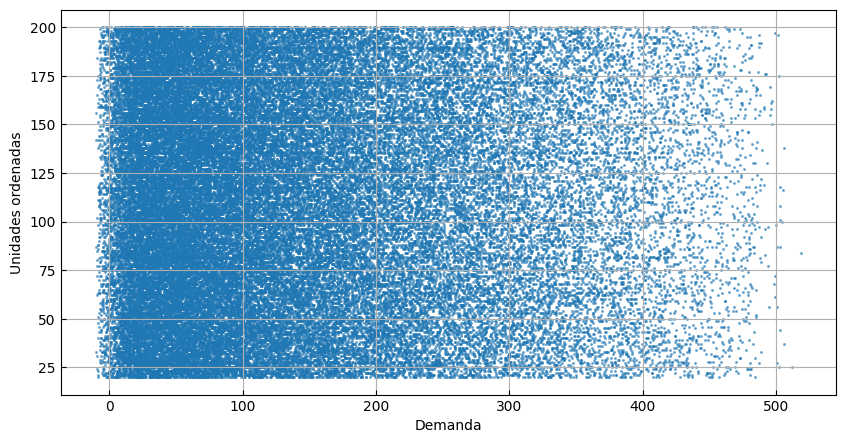

In [ ]:
# Creación de diagramas de disperción de cada variable de interés vs la demanda
Ys = ['Unidades vendidas','Inventario', 'Promoción', 'Descuento', 'Precio','Precio competencia', 'Unidades ordenadas']
x = 'Demanda'
for i in Ys:
    plt.figure(figsize=(10,5))
    plt.scatter(df_modelo[x],df_modelo[i],alpha=0.5,s=1.5)
    plt.xlabel(x)
    plt.ylabel(i)
    plt.tick_params(axis='both', direction='in')
    plt.grid(True, which='major', axis='both')
    plt.show()
    plt.close()

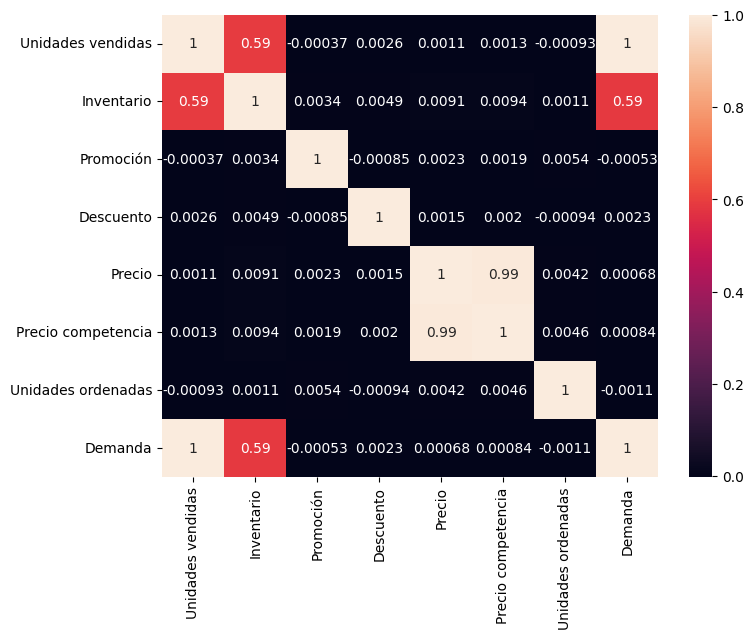

In [ ]:
# Matriz de corelación entre las variables de interés
orden = ['Unidades vendidas','Inventario', 'Promoción', 'Descuento', 'Precio','Precio competencia', 'Unidades ordenadas', 'Demanda']
cor = df_modelo[orden].corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(cor, annot=True)
plt.show()

Del analisis de realizado con scatter plots y la matríz de correlación notamos que el factor más importante para conocer la demanda en un periodo futuro de un producto, es la cantidad de unidades vendidas en un periodo presente-anterior.

El  nivel de inventario también marca una correlación considerable, pero por la forma triangular de su gráfica de disperción se puede ver que esto se debe a que las tiendas, cuando no presentan un inventaerio óptimo, tienden a tener una presencia importante de sobrestock y en menor medida algo de desabastecimiento.

Finalmente, factores cómo: Promoción, Descuento, Precio y Precio de la competencia, presentan una correlación nula. Pero esto se debe a la descontextualización de los datos al tomar en cuenta productos que tienen rangos de ventas muy diversos. Por lo que a  pesar de su correlación nula se los tendrá en cuenta para un modelo que trate de predecir la demanda a partir de estas variables.

## Modelo propuesto

Tras todo el analisis previo proponemos el siguiente modelo para calcular la demanda de un producto:

$$d = V + V*D*0.075 + Pr*V*0.025$$

donde:

$d$ = La demanda futura en un perido de tiempo $\Delta t$ futuro.

$V$ = Unidades vendidas en un perido de tiempo $\Delta t$ presente.

$D$ = Descuento del producto entre 0 y 1, 0% y 100% de descuento respectivamente.

$Pr$ = 0 o 1, según se este aplicando o no una promocion por día festivo

Este modelo tiene en cuenta las ventas extras que se obtienen al aplicarse descuentos o promociones: las ventas incrementan un 7.5% del porcentaje de algún descuento aplicado, y la existencia de alguna promoción por día festivo incrementa las ventas futuras en un 2.5%.

In [ ]:
# Función para calcular las demanda futura de un producto
def modelo_demanda(V,D,Pr):
    return V + V*(D/100)*0.075 + Pr*V*0.025

Para evaluar que el modelo utilice de forma adecuada las variables consideradas lo compararemos con la asunción sencilla de que demanda futura será igual a las ventas
actuales.
Para medir el nivel de acierto se usará el error absoluto medio respecto a todo el dataset.

$$MAE=\frac{1}{n}\sum|d_{real}-d_{predicho}|$$

In [ ]:
# Funcion para calcular el Error Absoluto Medio entre 2 arreglos de datos
def MAE_calc(x0,x1):
    return sum(abs(x0-x1))/len(x)

Ahora evaluamos nuestro modelo sobre todo el dataset y evaluamos su rendimiento.

In [ ]:
demanda_real = df_modelo['Demanda']
unidades_vendidas = df_modelo['Unidades vendidas']

# Evaluación del modelo
demanda_modelo = modelo_demanda(np.array(df_modelo['Unidades vendidas']),np.array(df_modelo['Descuento']),np.array(df_modelo['Promoción']))

# Rendimiento de nuestra aproximación
print(f'Error modelo: {MAE_calc(demanda_real,demanda_modelo)}')
print(f'Error unidades vendidas: {MAE_calc(demanda_real,unidades_vendidas)}')

Error modelo: 83810.72464285714
Error unidades vendidas: 87073.33142857142


El modelo provee una aproximación de la demanda mejor que la asumsión de quelas ventas se mantendrán constantes (Demanda = Unidades vendidas).

Y esto lo consigue con un uso fundamentado y presiso del impoacto que tienen las promociones y descuentos en ventas futuras, lo cual no es trivial.
Aún que la superioridad del modelo propuesto no es muy grande, ya supone una prueba de concepto clara sobre la escalabilidad y mejora futura a la que puede llegar este modelo con la implementación de algoritmos de inteligencia artificial, los cuales permitiran no solo encontrar configuracionees del modelo más óptimas sino también tener en cuenta más variables incluyendo las de tipo categórico.

A continuación se muestra como lucen las predicciones y sus respectivos errores para 100 casos predichos.

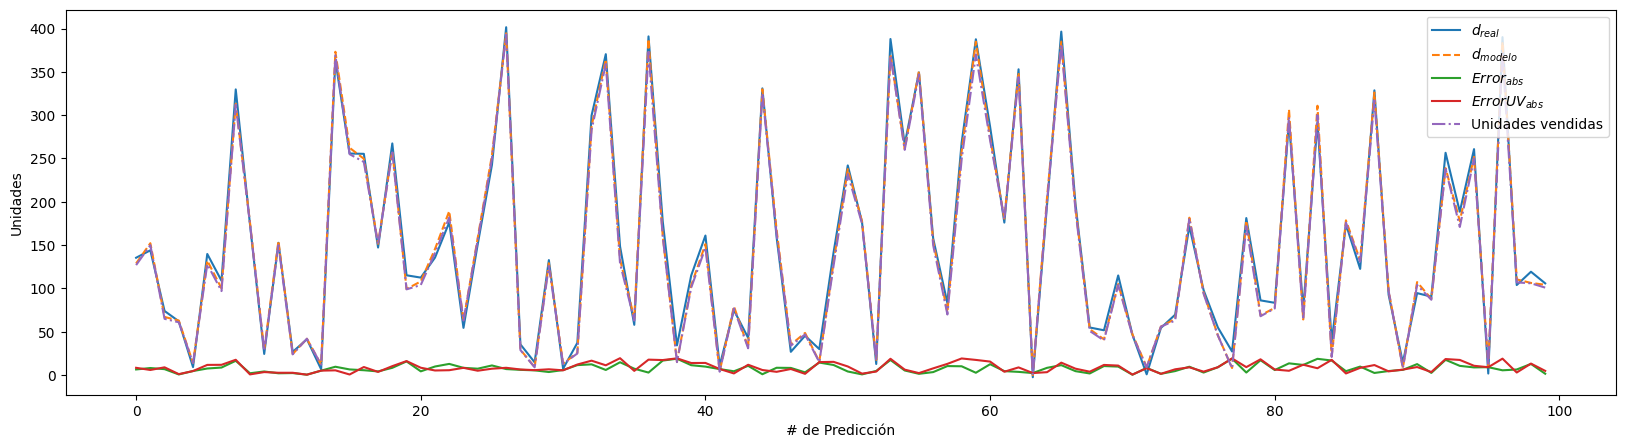

In [ ]:
a=100
plt.figure(figsize=(20,5))
plt.plot(demanda_real[:a], label='$d_{real}$')
plt.plot(demanda_modelo[:a], label='$d_{modelo}$',  ls='--')
plt.plot(abs(demanda_modelo-demanda_real)[:a], label='$Error_{abs}$')
plt.plot(abs(demanda_real-df_modelo['Unidades vendidas'])[:a], label='$ErrorUV_{abs}$')
plt.plot(df_modelo['Unidades vendidas'][:a],ls='-.',alpha=1,label='Unidades vendidas')
plt.legend()
plt.ylabel('Unidades')
plt.xlabel('# de Predicción')
plt.show()
plt.close()

## Prototipo de app sencilla para gestión de inventario

In [ ]:
# Función que notifica sobre el estado del inventario
# Sobrestock: las ventas son menores que un unblar del 30% del stock
# Desabastecimiento: las ventas son mayores al 90% del stock
def estado_inventario(stock, ventas):
    if ventas <= 0.3*stock:
        print('***Alerta: Tu inventario presenta sobrestock.***\nTus ventas son menores al 30% de tu stock disponible.\nAcontinuación te damos una recomendación para poder solventarlo:\n')
    elif ventas >= 0.9*stock:
        print('***Alerta: Tu inventario presenta desabastecimiento.***\nTus ventas son mayores al 90% de tu stock disponible.\nAcontinuación te damos una recomendación para poder solventarlo:\n')
    else:
        print('Tu inventario se encuentra en condición óptima.\nTe recoemndamos lo sigueinte para poder seguir manteniendolo así:\n')

In [ ]:
def app_inventario():
    # Solicitud de datos para comprobar el estado del inventario y dar recoemndaciones:
    stock = int(input('Ingrese su nivel de inventario al inicio del periodo:'))
    ventas = int(input('Ingrese el número de ventas realizadas durante el periodo:'))
    descuento = float(input('Ingrese el descuento (entre 0 y 100), que aplicará para el producto en un periodo futuro:'))
    promocion = input('¿Se aplicará alguna promoción de día festivo en el periodo futuro? [S/N]:').lower()
    if promocion=='s':
        promocion=1
    else:
        promocion=0

    # Notificación del estado del inventario
    print()
    estado_inventario(stock, ventas)

    # Calculo de la demanda a partir del modelo desarrollado
    demanda = modelo_demanda(ventas,descuento,promocion)
    print(f'Se estima una demanda de {demanda} para el periodo futuro.')

    # Calculo y reporte de la recoemndación para ordenes de productos futuros para mantener un inventario óptimo
    stock_disponible = stock - ventas
    if stock_disponible > demanda:
        print('Se recomienda no ordenar más unidades para reducir el nivel de sobrestock en el inventario.')
    else:
        ordenar = int(demanda - stock_disponible + demanda*0.1)
        print(f'Se recomienda ordenar {ordenar} unidades para el periodofuturo.')


App de inventario ejemplo guía de ingreso de datos:
Ingrese su nivel de inventario al inicio del periodo:100
Ingrese el número de ventas realizadas durante el periodo:10
Ingrese el descuento (entre 0 y 100), que aplicará para el producto en un periodo futuro:20
¿Se aplicará alguna promoción de día festivo en el periodo futuro? [S/N]:S


In [ ]:
app_inventario()

Ingrese su nivel de inventario al inicio del periodo:100
Ingrese el número de ventas realizadas durante el periodo:10
Ingrese el descuento (entre 0 y 100), que aplicará para el producto en un periodo futuro:0
¿Se aplicará alguna promoción de día festivo en el periodo futuro? [S/N]:N

***Alerta: Tu inventario presenta sobrestock.***
Tus ventas son menores al 30% de tu stock disponible.
Acontinuación te damos una recomendación para poder solventarlo:

Se estima una demanda de 10.0 para el periodo futuro.
Se recomienda no ordenar más unidades para reducir el nivel de sobrestock en el inventario.


In [ ]:
app_inventario()

Ingrese su nivel de inventario al inicio del periodo:100
Ingrese el número de ventas realizadas durante el periodo:92
Ingrese el descuento (entre 0 y 100), que aplicará para el producto en un periodo futuro:20
¿Se aplicará alguna promoción de día festivo en el periodo futuro? [S/N]:S

***Alerta: Tu inventario presenta desabastecimiento.***
Tus ventas son mayores al 90% de tu stock disponible.
Acontinuación te damos una recomendación para poder solventarlo:

Se estima una demanda de 95.67999999999999 para el periodo futuro.
Se recomienda ordenar 97 unidades para el periodofuturo.


In [ ]:
app_inventario()

Ingrese su nivel de inventario al inicio del periodo:500
Ingrese el número de ventas realizadas durante el periodo:375
Ingrese el descuento (entre 0 y 100), que aplicará para el producto en un periodo futuro:15
¿Se aplicará alguna promoción de día festivo en el periodo futuro? [S/N]:S

Tu inventario se encuentra en condición óptima.
Te recoemndamos lo sigueinte para poder seguir manteniendolo así:

Se estima una demanda de 388.59375 para el periodo futuro.
Se recomienda ordenar 302 unidades para el periodofuturo.


## Análisis de resultados

. INICIANDO SISTEMA DE INVENTARIO INTELIGENTE
 INICIANDO ANÁLISIS COMPLETO DE INVENTARIO Y DEMANDA...
Archivo encontrado en Kaggle: /kaggle/input/retail-store-inventory-forecasting-dataset/retail_store_inventory.csv

. Usando archivo: /kaggle/input/retail-store-inventory-forecasting-dataset/retail_store_inventory.csv
Cargando datos desde: /kaggle/input/retail-store-inventory-forecasting-dataset/retail_store_inventory.csv
. Datos cargados exitosamente: 73100 filas, 15 columnas
Columnas disponibles: ['date', 'store_id', 'product_id', 'category', 'region', 'inventory_level', 'units_sold', 'units_ordered', 'demand_forecast', 'price', 'discount', 'weather_condition', 'holiday_promotion', 'competitor_pricing', 'seasonality']
Datos preparados correctamente
Dimensiones del dataset: (73100, 19)

1.  DETECTANDO SOBRESTOCK Y DESABASTECIMIENTO...
 UMBRALES DE ANÁLISIS APLICADOS:
   • Sobrestock: menos del 30% de inventario vendido
   • Desabastecimiento: más del 90% de inventario vendido
   • Norm

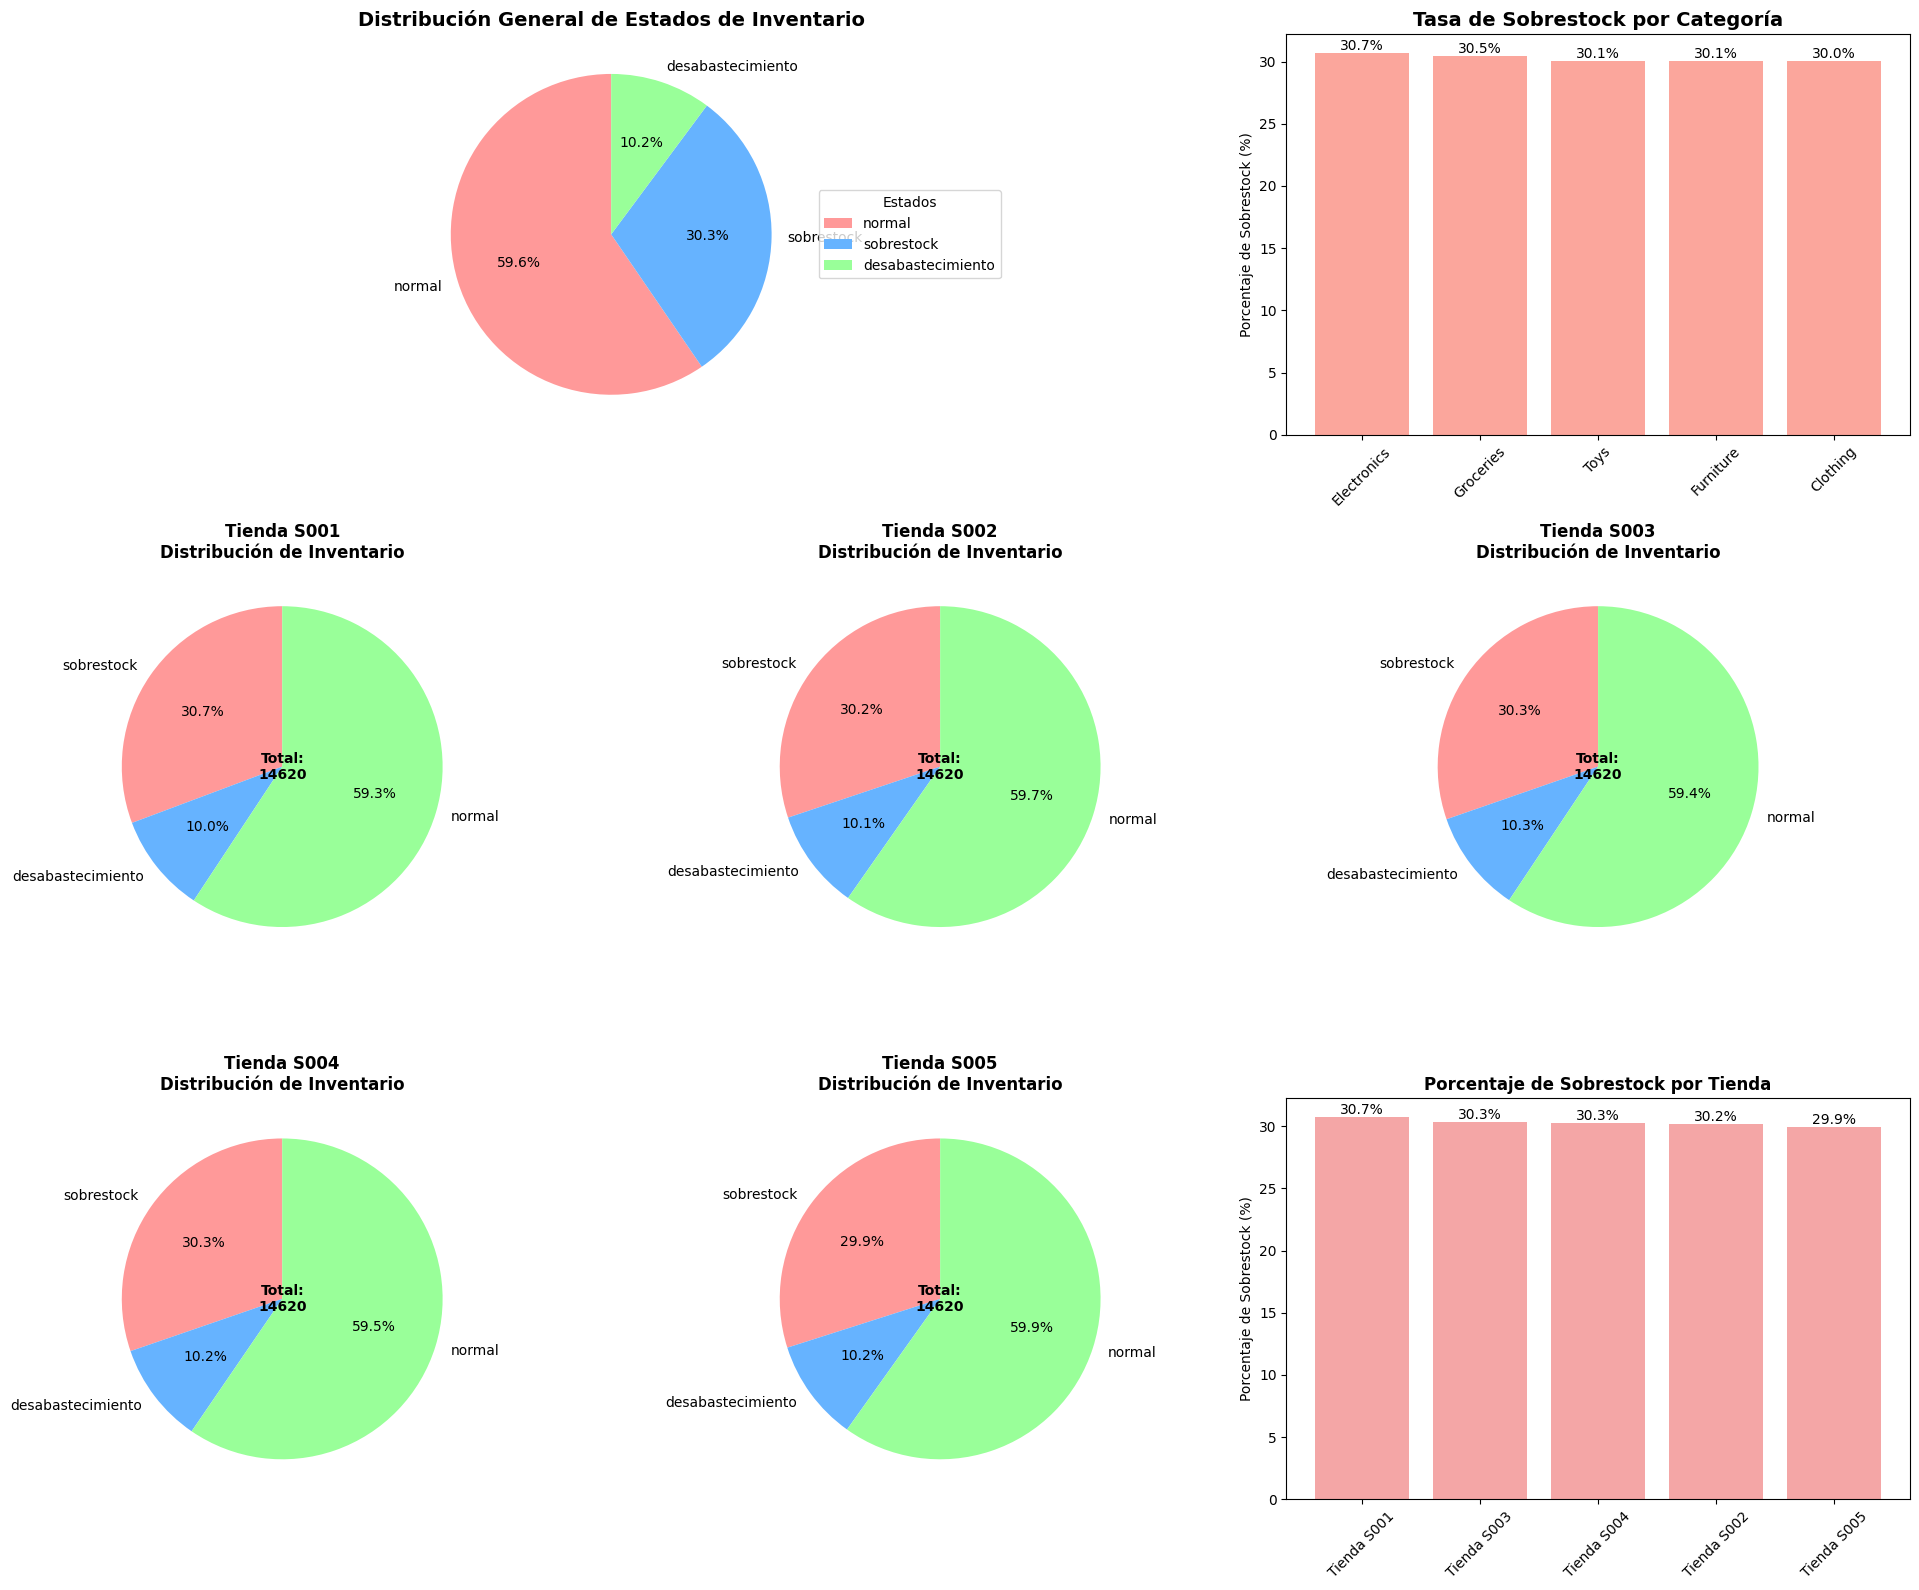

. ENTRENANDO MODELO PREDICTIVO...
. Modelo entrenado - Error absoluto promedio: 70.47
. GENERANDO ANÁLISIS DETALLADO DE ALERTAS...

. DASHBOARD EJECUTIVO - SISTEMA DE INVENTARIO INTELIGENTE
1. . CRÍTICA - DESABASTECIMIENTO
. RESUMEN: 7434 productos en riesgo de stock-out

. ANÁLISIS POR CATEGORÍA:
   . product_id:
      - Clothing: 1497
      - Electronics: 1435
      - Furniture: 1529
      - Groceries: 1517
      - Toys: 1456
   . inventory_level:
      - Clothing: 272.16
      - Electronics: 269.58
      - Furniture: 273.13
      - Groceries: 269.32
      - Toys: 271.28
   . units_sold:
      - Clothing: 258.32
      - Electronics: 256.46
      - Furniture: 259.53
      - Groceries: 256.25
      - Toys: 257.66
   . sell_through:
      - Clothing: 0.95
      - Electronics: 0.95
      - Furniture: 0.95
      - Groceries: 0.95
      - Toys: 0.95

. TOP 5 PRODUCTOS CRÍTICOS:
   • P0009 (Tienda S001) - Stock: 183 - Sell-through: 95.6%
   • P0015 (Tienda S001) - Stock: 379 - Sell-through:

In [ ]:
# ======================
# 10) Análisis de resultados
# ======================
class SistemaInventarioInteligente:
    def __init__(self):
        self.analizador = None
        self.modelo_predictivo = None
        self.alertas_activas = []
        self.metricas_globales = {}

    def entrenar_modelo_predictivo(self):
        """Entrena el modelo de forecasting de demanda"""
        print(". ENTRENANDO MODELO PREDICTIVO...")
        from sklearn.ensemble import RandomForestRegressor
        from sklearn.model_selection import train_test_split

        datos_modelo = self.analizador.datos.copy()

        if 'date' in datos_modelo.columns:
            datos_modelo['dia_semana'] = datos_modelo['date'].dt.dayofweek
            datos_modelo['mes'] = datos_modelo['date'].dt.month
            datos_modelo['trimestre'] = datos_modelo['date'].dt.quarter

        caracteristicas = ['inventory_level', 'price', 'discount', 'competitor_pricing',
                          'dia_semana', 'mes', 'trimestre']

        X = datos_modelo[caracteristicas].fillna(0)
        y = datos_modelo['units_sold']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        self.modelo_predictivo = RandomForestRegressor(n_estimators=100, random_state=42)
        self.modelo_predictivo.fit(X_train, y_train)

        predicciones = self.modelo_predictivo.predict(X_test)
        from sklearn.metrics import mean_absolute_error

        mae = mean_absolute_error(y_test, predicciones)
        print(f". Modelo entrenado - Error absoluto promedio: {mae:.2f}")

        return self.modelo_predictivo

    def generar_analisis_operativo_detallado(self):
        """Genera un análisis operativo detallado con interpretación de resultados"""
        print("\n" + "="*100)
        print("# .ANÁLISIS OPERATIVO DETALLADO - INTERPRETACIÓN DE RESULTADOS.")

        datos = self.analizador.datos
        total_productos = len(datos)
        productos_desabastecimiento = datos[datos['estado_inventario'] == 'desabastecimiento']
        productos_sobrestock = datos[datos['estado_inventario'] == 'sobrestock']

        # Calcular métricas clave
        tasa_desabastecimiento = (len(productos_desabastecimiento) / total_productos) * 100
        tasa_sobrestock = (len(productos_sobrestock) / total_productos) * 100
        rotacion_promedio = datos['inventory_turnover'].mean()
        sell_through_promedio = datos['sell_through'].mean() * 100

        print(f"\n## .. RESUMEN EJECUTIVO DEL ANÁLISIS.")
        print(f"El sistema ha identificado .problemas críticos de gestión de inventario. que requieren atención inmediata.")
        print(f"A continuación, el análisis detallado de cada métrica:")
        print(f"{'-'*80}")

        # ANÁLISIS DE DESABASTECIMIENTO
        print(f"\n## .. ALERTA CRÍTICA: DESABASTECIMIENTO.")
        print(f"\n.Números Obtenidos:.")
        print(f"- .{len(productos_desabastecimiento):,} productos. en riesgo de stock-out ({tasa_desabastecimiento:.1f}% del total)")
        if len(productos_desabastecimiento) > 0:
            sell_through_critico = productos_desabastecimiento['sell_through'].mean() * 100
            print(f"- .Sell-through promedio: {sell_through_critico:.1f}%. en productos críticos")

        print(f"\n.. INTERPRETACIÓN:.")
        print(f"| Métrica | Valor | Evaluación | Explicación |")
        print(f"|---------|-------|------------|-------------|")

        # Evaluar tasa de desabastecimiento
        if tasa_desabastecimiento > 10:
            eval_desab = ".. CRÍTICO."
            expl_desab = "Más del 10% de productos cerca de agotarse indica problemas graves de reposición"
        elif tasa_desabastecimiento > 5:
            eval_desab = ".. ALTO RIESGO."
            expl_desab = "Nivel preocupante que requiere atención inmediata"
        else:
            eval_desab = ".. ACEPTABLE."
            expl_desab = "Nivel dentro de parámetros normales"

        print(f"| .Tasa Desabastecimiento. | {tasa_desabastecimiento:.1f}% | {eval_desab} | {expl_desab} |")

        if len(productos_desabastecimiento) > 0:
            sell_through_eval = ".. CRÍTICO." if sell_through_critico > 95 else ".. ALTO RIESGO."
            sell_through_expl = "Nivel extremadamente peligroso - riesgo inminente de perder ventas" if sell_through_critico > 95 else "Alto riesgo de desabastecimiento"
            print(f"| .Sell-through Crítico. | {sell_through_critico:.1f}% | {sell_through_eval} | {sell_through_expl} |")

        print(f"\n.. IMPACTO NEGATIVO:.")
        print(f"- .Pérdida de ventas inmediata.")
        print(f"- .Clientes insatisfechos. (pueden cambiar de proveedor)")
        print(f"- .Daño a la reputación. de la marca")
        print(f"- .Costos de oportunidad. significativos")

        # ANÁLISIS DE SOBRESTOCK
        print(f"\n## .. ALERTA MODERADA: SOBRESTOCK.")
        print(f"\n.Números Obtenidos:.")
        print(f"- .{len(productos_sobrestock):,} productos. con exceso ({tasa_sobrestock:.1f}% del total)")

        if len(productos_sobrestock) > 0:
            valor_total_sobrestock = (productos_sobrestock['inventory_level'] * productos_sobrestock['price']).sum()
            costo_almacenamiento_estimado = valor_total_sobrestock * 0.25
            rotacion_sobrestock = productos_sobrestock['inventory_turnover'].mean()

            print(f"- .Valor inmovilizado: ${valor_total_sobrestock:,.2f}.")
            print(f"- .Costo almacenamiento anual: ${costo_almacenamiento_estimado:,.2f}.")
            print(f"- .Rotación promedio: {rotacion_sobrestock:.3f}.")

        print(f"\n.. INTERPRETACIÓN:.")
        print(f"| Métrica | Valor | Evaluación | Explicación |")
        print(f"|---------|-------|------------|-------------|")

        # Evaluar tasa de sobrestock
        if tasa_sobrestock > 25:
            eval_sobre = ".. CRÍTICO."
            expl_sobre = "Más del 25% del inventario está sobredimensionado - problema sistémico"
        elif tasa_sobrestock > 15:
            eval_sobre = ".. ALTO."
            expl_sobre = "Nivel elevado que requiere acción correctiva"
        else:
            eval_sobre = ".. ACEPTABLE."
            expl_sobre = "Dentro de parámetros normales de operación"

        print(f"| .Tasa Sobrestock. | {tasa_sobrestock:.1f}% | {eval_sobre} | {expl_sobre} |")

        if len(productos_sobrestock) > 0:
            # Evaluar capital inmovilizado
            if valor_total_sobrestock > 100000000:  # 100 millones
                eval_capital = ".. CRÍTICO."
                expl_capital = "Recursos financieros significativos improductivos"
            elif valor_total_sobrestock > 50000000:
                eval_capital = ".. ALTO."
                expl_capital = "Capital importante inmovilizado"
            else:
                eval_capital = ".. MANEJABLE."
                expl_capital = "Nivel aceptable de capital inmovilizado"

            print(f"| .Capital Inmovilizado. | ${valor_total_sobrestock:,.2f} | {eval_capital} | {expl_capital} |")

            # Evaluar rotación
            if rotacion_sobrestock < 0.2:
                eval_rot = ".. PÉSIMA."
                expl_rot = "Los productos rotan menos de 1 vez cada 5 años"
            elif rotacion_sobrestock < 0.5:
                eval_rot = ".. MUY BAJA."
                expl_rot = "Rotación extremadamente lenta"
            else:
                eval_rot = ".. ACEPTABLE."
                expl_rot = "Rotación dentro de parámetros normales"

            print(f"| .Rotación. | {rotacion_sobrestock:.3f} | {eval_rot} | {expl_rot} |")

        print(f"\n.. IMPACTO FINANCIERO:.")
        print(f"- .Alto costo de oportunidad. (dinero que no genera retorno)")
        print(f"- .Riesgo de obsolescencia. y merma")
        print(f"- .Espacio de almacén subutilizado.")
        print(f"- .Costos operativos innecesarios.")

        # ANÁLISIS DE PRECISIÓN DE PRONÓSTICOS
        print(f"\n## .. ALERTA TÉCNICA: PRECISIÓN DE PRONÓSTICOS.")
        print(f"\n.Números Obtenidos:.")

        if 'abs_forecast_error' in datos.columns:
            alto_error = datos[datos['abs_forecast_error'] > datos['abs_forecast_error'].quantile(0.75)]
            error_modelo = datos['abs_forecast_error'].mean()

            print(f"- .{len(alto_error):,} productos. con alto error de predicción")
            print(f"- .Error absoluto promedio del modelo: {error_modelo:.2f} unidades.")

            print(f"\n.. INTERPRETACIÓN:.")
            print(f"| Métrica | Valor | Evaluación | Explicación |")
            print(f"|---------|-------|------------|-------------|")

            # Evaluar error del modelo
            if error_modelo > 50:
                eval_error = ".. REGULAR."
                expl_error = "Error significativo que afecta la precisión de las decisiones"
            elif error_modelo > 20:
                eval_error = ".. ACEPTABLE."
                expl_error = "Error moderado que puede mejorarse"
            else:
                eval_error = ".. BUENO."
                expl_error = "Precisión adecuada para la toma de decisiones"

            print(f"| .Error Modelo. | {error_modelo:.2f} | {eval_error} | {expl_error} |")

            # Evaluar volumen de productos problemáticos
            tasa_error = (len(alto_error) / total_productos) * 100
            if tasa_error > 20:
                eval_vol = ".. ALTO VOLUMEN."
                expl_vol = "Más del 20% de productos con pronósticos inexactos"
            else:
                eval_vol = ".. MANEJABLE."
                expl_vol = "Volumen aceptable de productos con errores"

            print(f"| .Productos Problemáticos. | {len(alto_error):,} | {eval_vol} | {expl_vol} |")

            print(f"\n.. IMPACTO OPERATIVO:.")
            print(f"- .Decisiones de compra basadas en datos erróneos.")
            print(f"- .Mayor probabilidad. de sobrestock/desabastecimiento")
            print(f"- .Ineficiencia. en la cadena de suministro")

        # ANÁLISIS OPERATIVO GLOBAL
        print(f"\n## .. ANÁLISIS OPERATIVO GLOBAL.")
        print(f"\n.Métricas Clave:.")
        print(f"| Métrica | Valor | Meta Ideal | Brecha | Evaluación |")
        print(f"|---------|-------|------------|---------|------------|")

        # Evaluar cada métrica global
        meta_sobrestock = 15.0
        brecha_sobrestock = tasa_sobrestock - meta_sobrestock
        eval_sobrestock_global = ".. INACEPTABLE." if brecha_sobrestock > 5 else ".. MEJORABLE."

        meta_desabastecimiento = 5.0
        brecha_desabastecimiento = tasa_desabastecimiento - meta_desabastecimiento
        eval_desab_global = ".. INACEPTABLE." if brecha_desabastecimiento > 3 else ".. MEJORABLE."

        meta_rotacion = 2.0
        brecha_rotacion = meta_rotacion - rotacion_promedio
        eval_rotacion_global = ".. MUY BAJA." if brecha_rotacion > 1.0 else ".. MEJORABLE."

        meta_sell_through = 65.0
        brecha_sell_through = meta_sell_through - sell_through_promedio
        eval_sell_through_global = ".. MEJORABLE." if brecha_sell_through > 10 else ".. ACEPTABLE."

        print(f"| .Total Productos. | {total_productos:,} | - | - | Base de análisis |")
        print(f"| .Tasa Sobrestock. | {tasa_sobrestock:.1f}% | <{meta_sobrestock}% | +{brecha_sobrestock:.1f}% | {eval_sobrestock_global} |")
        print(f"| .Tasa Desabastecimiento. | {tasa_desabastecimiento:.1f}% | <{meta_desabastecimiento}% | +{brecha_desabastecimiento:.1f}% | {eval_desab_global} |")
        print(f"| .Rotación Promedio. | {rotacion_promedio:.3f} | >{meta_rotacion} | -{brecha_rotacion:.3f} | {eval_rotacion_global} |")
        print(f"| .Sell-through Promedio. | {sell_through_promedio:.1f}% | {meta_sell_through}% | -{brecha_sell_through:.1f}% | {eval_sell_through_global} |")

        # DIAGNÓSTICO INTEGRAL
        print(f"\n## .. DIAGNÓSTICO INTEGRAL.")
        print(f"\n.. PROBLEMAS IDENTIFICADOS:.")

        problemas_totales = tasa_sobrestock + tasa_desabastecimiento
        print(f"1. .GESTIÓN DE INVENTARIO INEFICIENTE.")
        print(f"   - {problemas_totales:.1f}% de productos con problemas ({tasa_sobrestock:.1f}% sobrestock + {tasa_desabastecimiento:.1f}% desabastecimiento)")
        print(f"   - Rotación extremadamente baja ({rotacion_promedio:.3f} vs ideal >{meta_rotacion})")

        print(f"2. .PROBLEMAS SISTÉMICOS DE REPOSICIÓN.")
        print(f"   - Políticas de compra inconsistentes")
        print(f"   - Puntos de reorden mal calculados")

        if 'abs_forecast_error' in datos.columns:
            print(f"3. .PRONÓSTICOS INEXACTOS.")
            print(f"   - Modelo predictivo con error significativo ({error_modelo:.2f} unidades)")
            print(f"   - Datos insuficientes o características incorrectas")

        print(f"\n.. RECOMENDACIONES ESTRATÉGICAS:.")

        print(f"\n.. PRIORIDAD ALTA (Acción Inmediata):.")
        print(f"1. .Revisar puntos de reorden. para productos en desabastecimiento")
        print(f"2. .Implementar promociones agresivas. para reducir sobrestock")
        print(f"3. .Congelar compras. de productos con alta rotación lenta")

        print(f"\n.. PRIORIDAD MEDIA (Corto Plazo):.")
        print(f"1. .Optimizar modelo predictivo. con más características")
        print(f"2. .Establecer KPIs. por categoría y tienda")
        print(f"3. .Mejorar proceso de forecast. con datos de ventas reales")

        print(f"\n.. PRIORIDAD BAJA (Mediano Plazo):.")
        print(f"1. .Automatizar sistema de alertas.")
        print(f"2. .Implementar dashboard en tiempo real.")
        print(f"3. .Capacitar equipo en gestión de inventario.")

        # EVALUACIÓN FINAL
        print(f"\n EVALUACIÓN FINAL DEL SISTEMA")
        print(f"\n.. ASPECTOS POSITIVOS:")
        print(f"- Sistema identifica problemas claramente")
        print(f"- Análisis detallado por categoría y tienda")
        print(f"- Cálculo preciso de impactos financieros")

        print(f"\n.. ASPECTOS A MEJORAR:.")
        print(f"- Modelo predictivo necesita optimización")
        print(f"- Políticas de inventario requieren revisión")
        print(f"- Procesos de reposición ineficientes")

        print(f"\n.. PUNTO CRÍTICO:.")
        print(f".El {problemas_totales:.1f}% del inventario presenta problemas., indicando que se requiere una .revisión completa. de las estrategias de gestión de inventario y una .reestructuración. de los procesos operativos.")

        print(f".. CONCLUSIÓN:. El sistema evidencia una .oportunidad significativa de mejora. que podría liberar .capital de trabajo. y mejorar sustancialmente la rentabilidad operativa.")

    def generar_alertas_detalladas(self):
        """Genera alertas ultra-detalladas con análisis profundo"""
        print(". GENERANDO ANÁLISIS DETALLADO DE ALERTAS...")

        alertas_detalladas = []
        datos = self.analizador.datos

        # ANÁLISIS 1: DESABASTECIMIENTO CRÍTICO
        productos_desabastecimiento = datos[datos['estado_inventario'] == 'desabastecimiento']
        if len(productos_desabastecimiento) > 0:
            analisis_categoria = productos_desabastecimiento.groupby('category').agg({
                'product_id': 'count',
                'inventory_level': 'mean',
                'units_sold': 'mean',
                'sell_through': 'mean'
            }).round(2)

            productos_criticos = productos_desabastecimiento[productos_desabastecimiento['sell_through'] > 0.95]

            alerta_desabastecimiento = {
                'tipo': '. CRÍTICA - DESABASTECIMIENTO',
                'resumen': f'{len(productos_desabastecimiento)} productos en riesgo de stock-out',
                'detalle_categorias': analisis_categoria.to_dict(),
                'productos_criticos': productos_criticos[['product_id', 'store_id', 'category', 'inventory_level', 'sell_through']].head(10).to_dict('records'),
                'impacto': 'Pérdida de ventas y clientes insatisfechos',
                'accion_recomendada': 'REPOSICIÓN INMEDIATA'
            }
            alertas_detalladas.append(alerta_desabastecimiento)

        # ANÁLISIS 2: SOBRESTOCK COSTOSO
        productos_sobrestock = datos[datos['estado_inventario'] == 'sobrestock']
        if len(productos_sobrestock) > 0:
            valor_total_sobrestock = (productos_sobrestock['inventory_level'] * productos_sobrestock['price']).sum()
            costo_almacenamiento_estimado = valor_total_sobrestock * 0.25
            productos_sobrestock['valor_total'] = productos_sobrestock['inventory_level'] * productos_sobrestock['price']

            analisis_sobrestock_cat = productos_sobrestock.groupby('category').agg({
                'product_id': 'count',
                'inventory_level': 'mean',
                'price': 'mean',
                'valor_total': 'sum'
            }).round(2)

            alerta_sobrestock = {
                'tipo': '. ADVERTENCIA - SOBRESTOCK',
                'resumen': f'{len(productos_sobrestock)} productos con exceso de inventario',
                'impacto_financiero': {
                    'valor_inmovilizado': f'${valor_total_sobrestock:,.2f}',
                    'costo_almacenamiento_anual': f'${costo_almacenamiento_estimado:,.2f}',
                    'rotacion_promedio': f"{productos_sobrestock['inventory_turnover'].mean():.3f}"
                },
                'analisis_categorias': analisis_sobrestock_cat.to_dict(),
                'productos_problematicos': productos_sobrestock.nsmallest(5, 'sell_through')[['product_id', 'store_id', 'category', 'inventory_level', 'sell_through']].to_dict('records'),
                'accion_recomendada': 'PROMOCIONES Y AJUSTE DE COMPRAS'
            }
            alertas_detalladas.append(alerta_sobrestock)

        # ANÁLISIS 3: ERRORES DE PRONÓSTICO
        if 'abs_forecast_error' in datos.columns:
            alto_error = datos[datos['abs_forecast_error'] > datos['abs_forecast_error'].quantile(0.75)]
            if len(alto_error) > 0:
                precision_por_categoria = datos.groupby('category').apply(
                    lambda x: (abs(x['units_sold'] - x['demand_forecast']).mean())
                ).round(2)

                alerta_pronostico = {
                    'tipo': '. MEJORA - PRECISIÓN DE PRONÓSTICOS',
                    'resumen': f'{len(alto_error)} productos con alto error de predicción',
                    'precision_general': f"Error promedio: {datos['abs_forecast_error'].mean():.2f} unidades",
                    'precision_por_categoria': precision_por_categoria.to_dict(),
                    'productos_mejorable': alto_error.nlargest(5, 'abs_forecast_error')[['product_id', 'store_id', 'units_sold', 'demand_forecast', 'abs_forecast_error']].to_dict('records'),
                    'accion_recomendada': 'OPTIMIZAR MODELO PREDICTIVO'
                }
                alertas_detalladas.append(alerta_pronostico)

        # ANÁLISIS 4: EFICIENCIA OPERATIVA
        alerta_operativa = {
            'tipo': '. ANÁLISIS OPERATIVO',
            'metricas_globales': {
                'total_productos_analizados': len(datos),
                'tasa_sobrestock_global': f"{(len(productos_sobrestock)/len(datos))*100:.1f}%",
                'tasa_desabastecimiento_global': f"{(len(productos_desabastecimiento)/len(datos))*100:.1f}%",
                'rotacion_promedio': f"{datos['inventory_turnover'].mean():.3f}",
                'sell_through_promedio': f"{datos['sell_through'].mean()*100:.1f}%"
            },
            'tiendas_problematicas': self._analizar_tiendas_problematicas(datos),
            'categorias_prioritarias': self._identificar_categorias_prioritarias(datos)
        }
        alertas_detalladas.append(alerta_operativa)

        self.alertas_activas = alertas_detalladas
        return alertas_detalladas

    def _analizar_tiendas_problematicas(self, datos):
        """Identifica tiendas con mayores problemas"""
        analisis_tiendas = datos.groupby('store_id').agg({
            'estado_inventario': lambda x: (x == 'sobrestock').mean(),
            'sell_through': 'mean',
            'inventory_turnover': 'mean',
            'abs_forecast_error': 'mean'
        }).round(3)

        return analisis_tiendas.nlargest(3, 'estado_inventario').to_dict()

    def _identificar_categorias_prioritarias(self, datos):
        """Identifica categorías que requieren atención inmediata"""
        categorias_prioritarias = datos.groupby('category').agg({
            'estado_inventario': lambda x: (x == 'sobrestock').mean() + (x == 'desabastecimiento').mean(),
            'sell_through': 'std',
            'inventory_turnover': 'mean'
        }).round(3)

        return categorias_prioritarias.nlargest(3, 'estado_inventario').to_dict()

    def mostrar_dashboard_avanzado(self):
        """Muestra un dashboard ejecutivo ultra-detallado"""
        print("\n" + "="*80)
        print(". DASHBOARD EJECUTIVO - SISTEMA DE INVENTARIO INTELIGENTE")
        print("="*80)

        for i, alerta in enumerate(self.alertas_activas, 1):
            print(f"{i}. {alerta['tipo']}")

            if 'resumen' in alerta:
                print(f". RESUMEN: {alerta['resumen']}")

            if 'impacto_financiero' in alerta:
                print("\n. IMPACTO FINANCIERO:")
                for clave, valor in alerta['impacto_financiero'].items():
                    print(f"   • {clave.replace('_', ' ').title()}: {valor}")

            if 'metricas_globales' in alerta:
                print("\n. MÉTRICAS GLOBALES:")
                for clave, valor in alerta['metricas_globales'].items():
                    print(f"   • {clave.replace('_', ' ').title()}: {valor}")

            if 'detalle_categorias' in alerta:
                print("\n. ANÁLISIS POR CATEGORÍA:")
                for categoria, metrics in alerta['detalle_categorias'].items():
                    print(f"   . {categoria}:")
                    for metric, valor in metrics.items():
                        print(f"      - {metric}: {valor}")

            if 'productos_criticos' in alerta and alerta['productos_criticos']:
                print(f"\n. TOP 5 PRODUCTOS CRÍTICOS:")
                for prod in alerta['productos_criticos'][:5]:
                    print(f"   • {prod['product_id']} (Tienda {prod['store_id']}) - Stock: {prod['inventory_level']} - Sell-through: {prod['sell_through']*100:.1f}%")

            if 'accion_recomendada' in alerta:
                print(f"\n. ACCIÓN RECOMENDADA: {alerta['accion_recomendada']}")

            print(f"\n{'─'*50}")

# SISTEMA PRINCIPAL
def ejecutar_sistema():
    """Ejecuta el sistema completo con dashboard ."""
    sistema = SistemaInventarioInteligente()

    # 1. Cargar y analizar datos
    sistema.analizador = ejecutar_analisis_completo()

    # 2. Entrenar modelo predictivo
    sistema.entrenar_modelo_predictivo()

    # 3. Generar alertas detalladas
    sistema.generar_alertas_detalladas()

    # 4. Mostrar dashboard avanzado
    sistema.mostrar_dashboard_avanzado()

    # 5. Mostrar análisis operativo detallado
    sistema.generar_analisis_operativo_detallado()

    return sistema

# EJECUTAR SISTEMA
if __name__ == "__main__":
    print(". INICIANDO SISTEMA DE INVENTARIO INTELIGENTE")
    sistema_mejorado = ejecutar_sistema()